In [2]:
import os
from datetime import date
from lrp_update import query_openet

# Query the OpenET database and update the local master dataset

In [3]:
# Create an Openet object with a path to the database and the api key
path_to_folder_with_data = r'Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Enforcement Documentation\OpenET\consolidated_openet_datasets'

# For security reasons the repository does not contain the `CH_OpenET_APIkey.txt` key referenced below, please update the path to the corresponding key to access the OpenET service  
path_to_openet_key = r'Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Enforcement Documentation\OpenET\CH_OpenET_APIkey.txt'

## DO NOT EDIT BELOW THIS LINE

open_et_obj = query_openet.OpenetApi.from_file(path_dataset=path_to_folder_with_data,
                                     fn_key=path_to_openet_key)



In [4]:

# add years as needed
years=["Year1", "Year2"]


## DO NOT EDIT BELOW THIS LINE

# Query the database and if necessary update the local dataset 
today = date.today().strftime('%Y-%m-%d')

for year in years:
    
    for repurposed in ["repurposed", "nonrepurposed"]:

        # UPDATE ET
        query_et = {
        "variable": "ET",
        "start_date": "2018-01-01",
        "end_date": today,
        "interval": "monthly",
        "model": "ensemble",
        "reducer": "mean",
        "reference_et": "cimis",
        "units": "in",
        "attributes": "EKIfld",
        "asset_id": f"projects/ee-csheppner/assets/{year}_enrolled_{repurposed}",                
        }
    
        open_et_obj.update_local_dataset(**query_et)
    
        # UPDATE Precip
        query_pp = {
        "variable": "pr",
        "start_date": "2018-01-01",
        "end_date": today,
        "interval": "monthly",
        "model": "ensemble",
        "reducer": "mean",
        "reference_et": "cimis",
        "units": "in",
        "attributes": "EKIfld",
        "asset_id": f"projects/ee-csheppner/assets/{year}_enrolled_{repurposed}",                
        }
    
        open_et_obj.update_local_dataset(**query_pp)

Requested data for period 2018-01-01:2024-10-09 extends beyond data available locally for variable ET
Requesting new available data for ET...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-10-09 extends beyond data available locally for variable pr
Requesting new available data for pr...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-10-09 extends beyond data available locally for variable ET
Requesting new available data for ET...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-10-09 extends beyond data available locally for variable pr
Requesting new available data for pr...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-10-09 extends beyond data available locally for variable ET
Requesting new available data for ET...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-10-09 extends beyond data available locally for variable pr
Requesti

# Produce LRP Reports

## Paths to the EKIfld_IDs_key file and the pdf reports to use as templates 

In [5]:
path_ekifld = "Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Enforcement Documentation\OpenET\consolidated_openet_datasets\EKIfld_IDs_key.csv"
path_to_pdf_templates = r"Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Enforcement Documentation\report_templates"

## Produce the reports for the desired water year and quarter

The cell below will cycle through all the reports in the `path_to_pdf_templates` and produce updated reports for the corresponding farm in each template 

Creating report with the following information
LRPAgreementNumber  00001
LRPParticipantName  Maradani
AreaofLandRepurposed  73.50 acres
MinimumWaterUseReduction  77.12 AFY
BaselineWaterUse  118.96 AFY
MaximumConsumptiveUse  41.83 AFY
Processing report for  Maradani,  00001
calculating consumptive use for 0    4
1    9
Name: EKIfld, dtype: int64
Creating report with the following information
LRPAgreementNumber  00005
LRPParticipantName  Nyman
AreaofLandRepurposed  479.70 acres
MinimumWaterUseReduction  875.57 AFY
BaselineWaterUse  1201.92 AFY
MaximumConsumptiveUse  326.35 AFY
Processing report for  Nyman,  00005
calculating consumptive use for 31    16
32    22
33    25
34    37
Name: EKIfld, dtype: int64
Creating report with the following information
LRPAgreementNumber  00007
LRPParticipantName  Robson
AreaofLandRepurposed  101.33 acres
MinimumWaterUseReduction  233.73 AFY
BaselineWaterUse  309.57 AFY
MaximumConsumptiveUse  75.84 AFY
Processing report for  Robson,  00007
calculating co

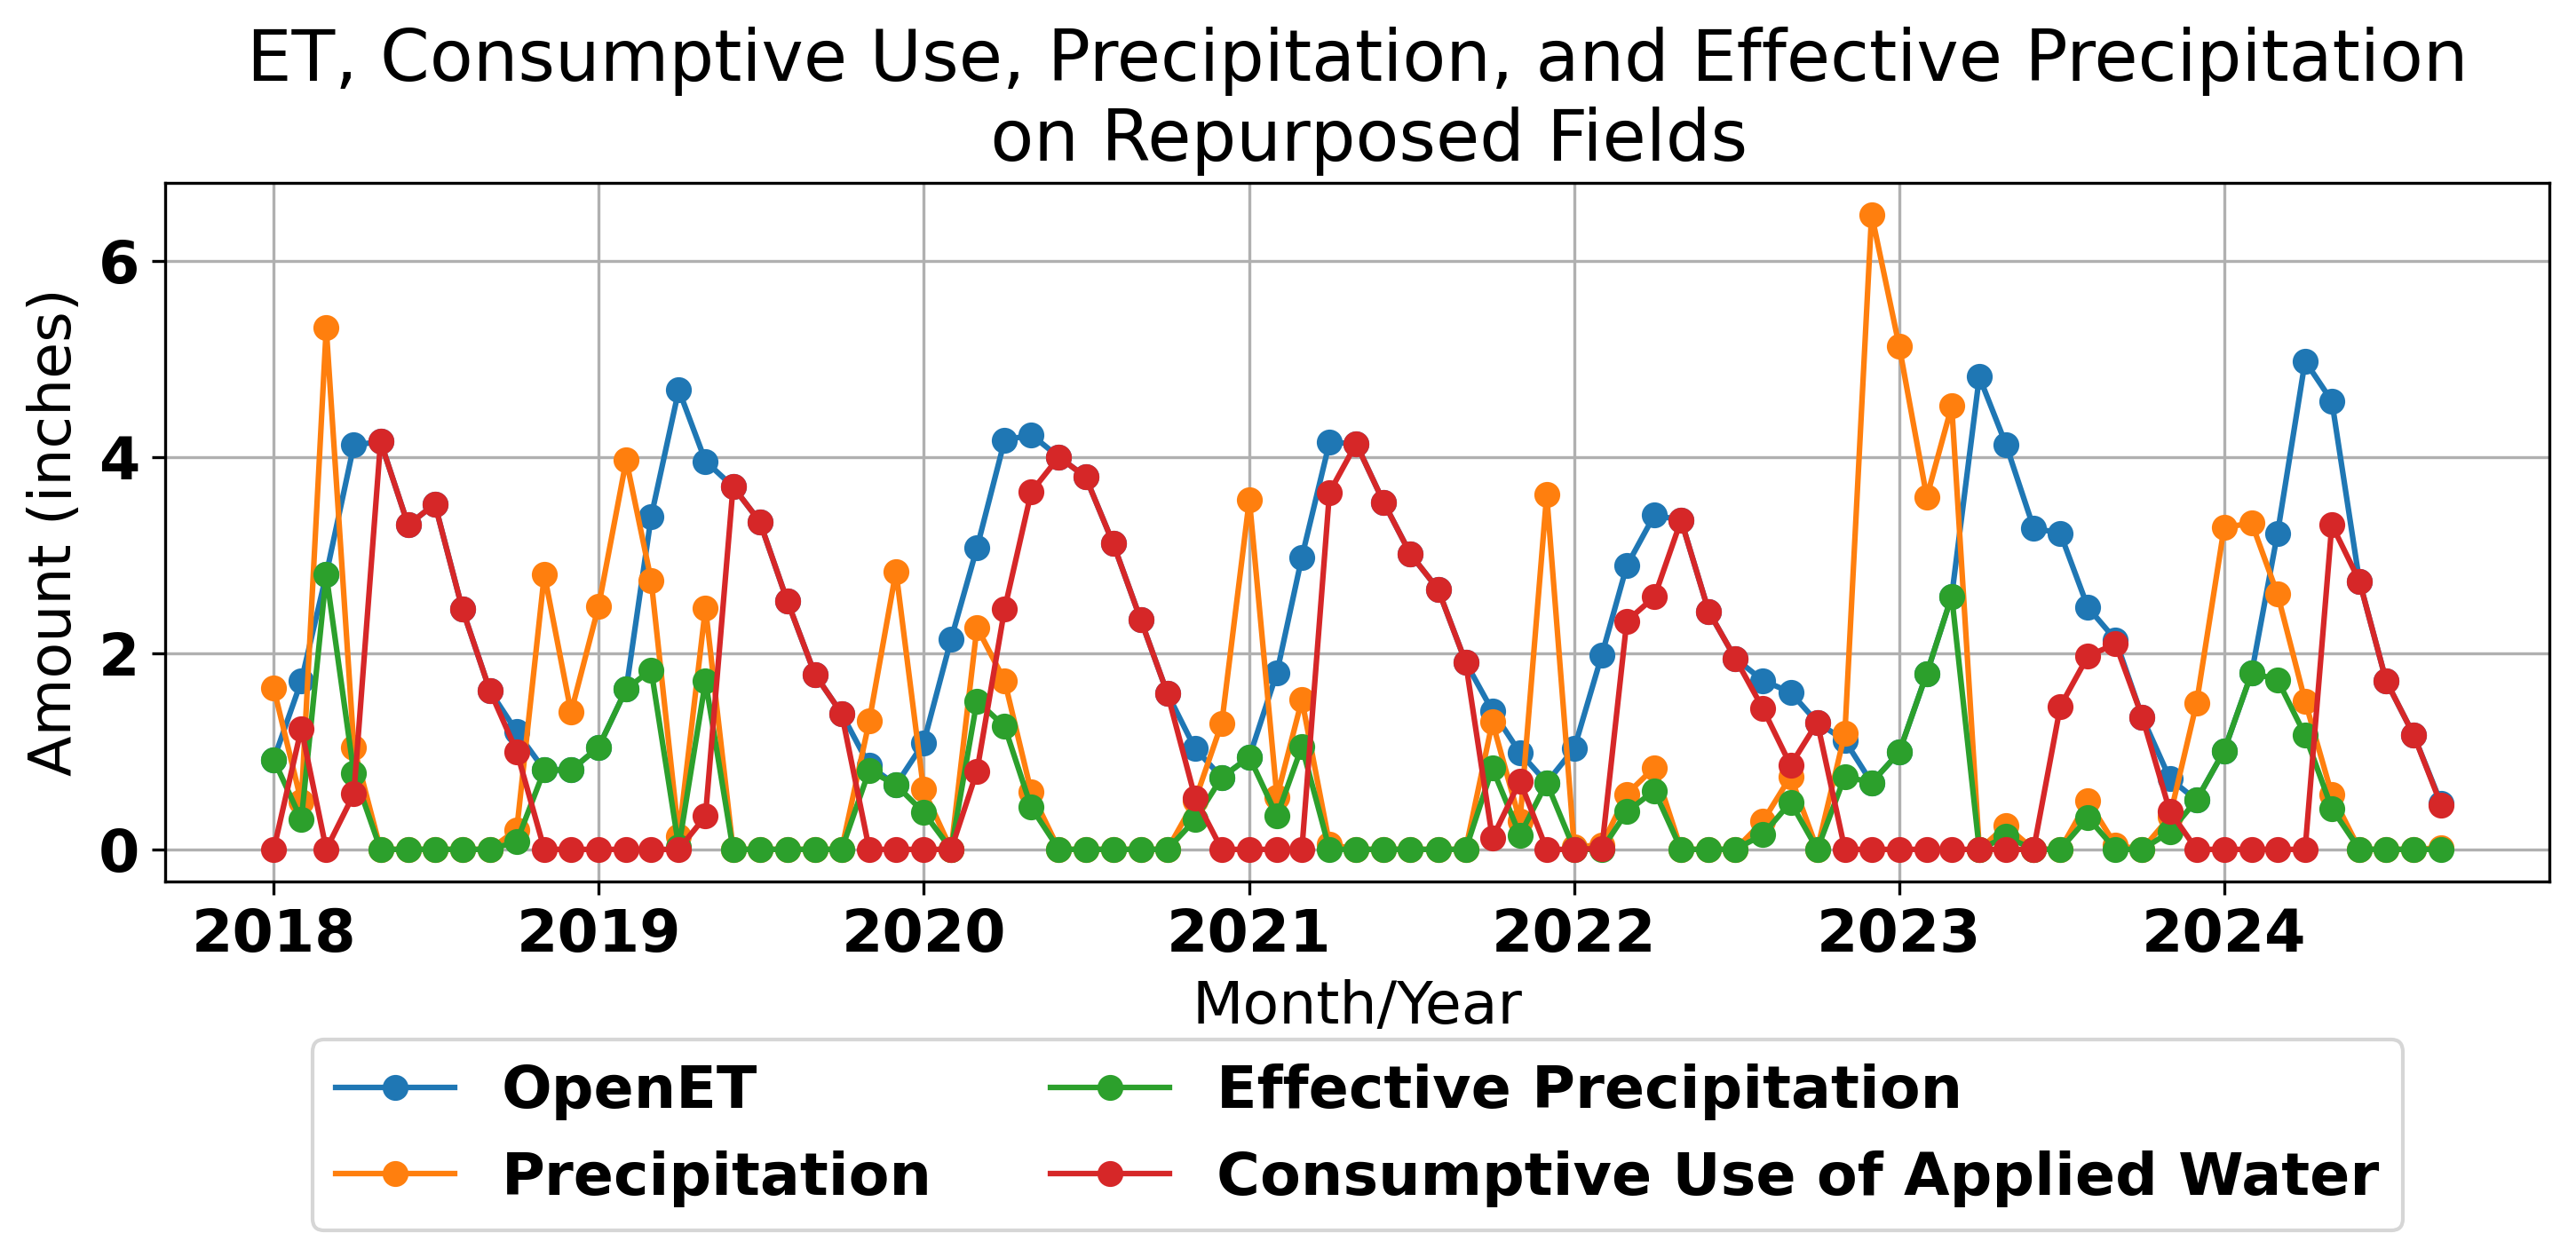

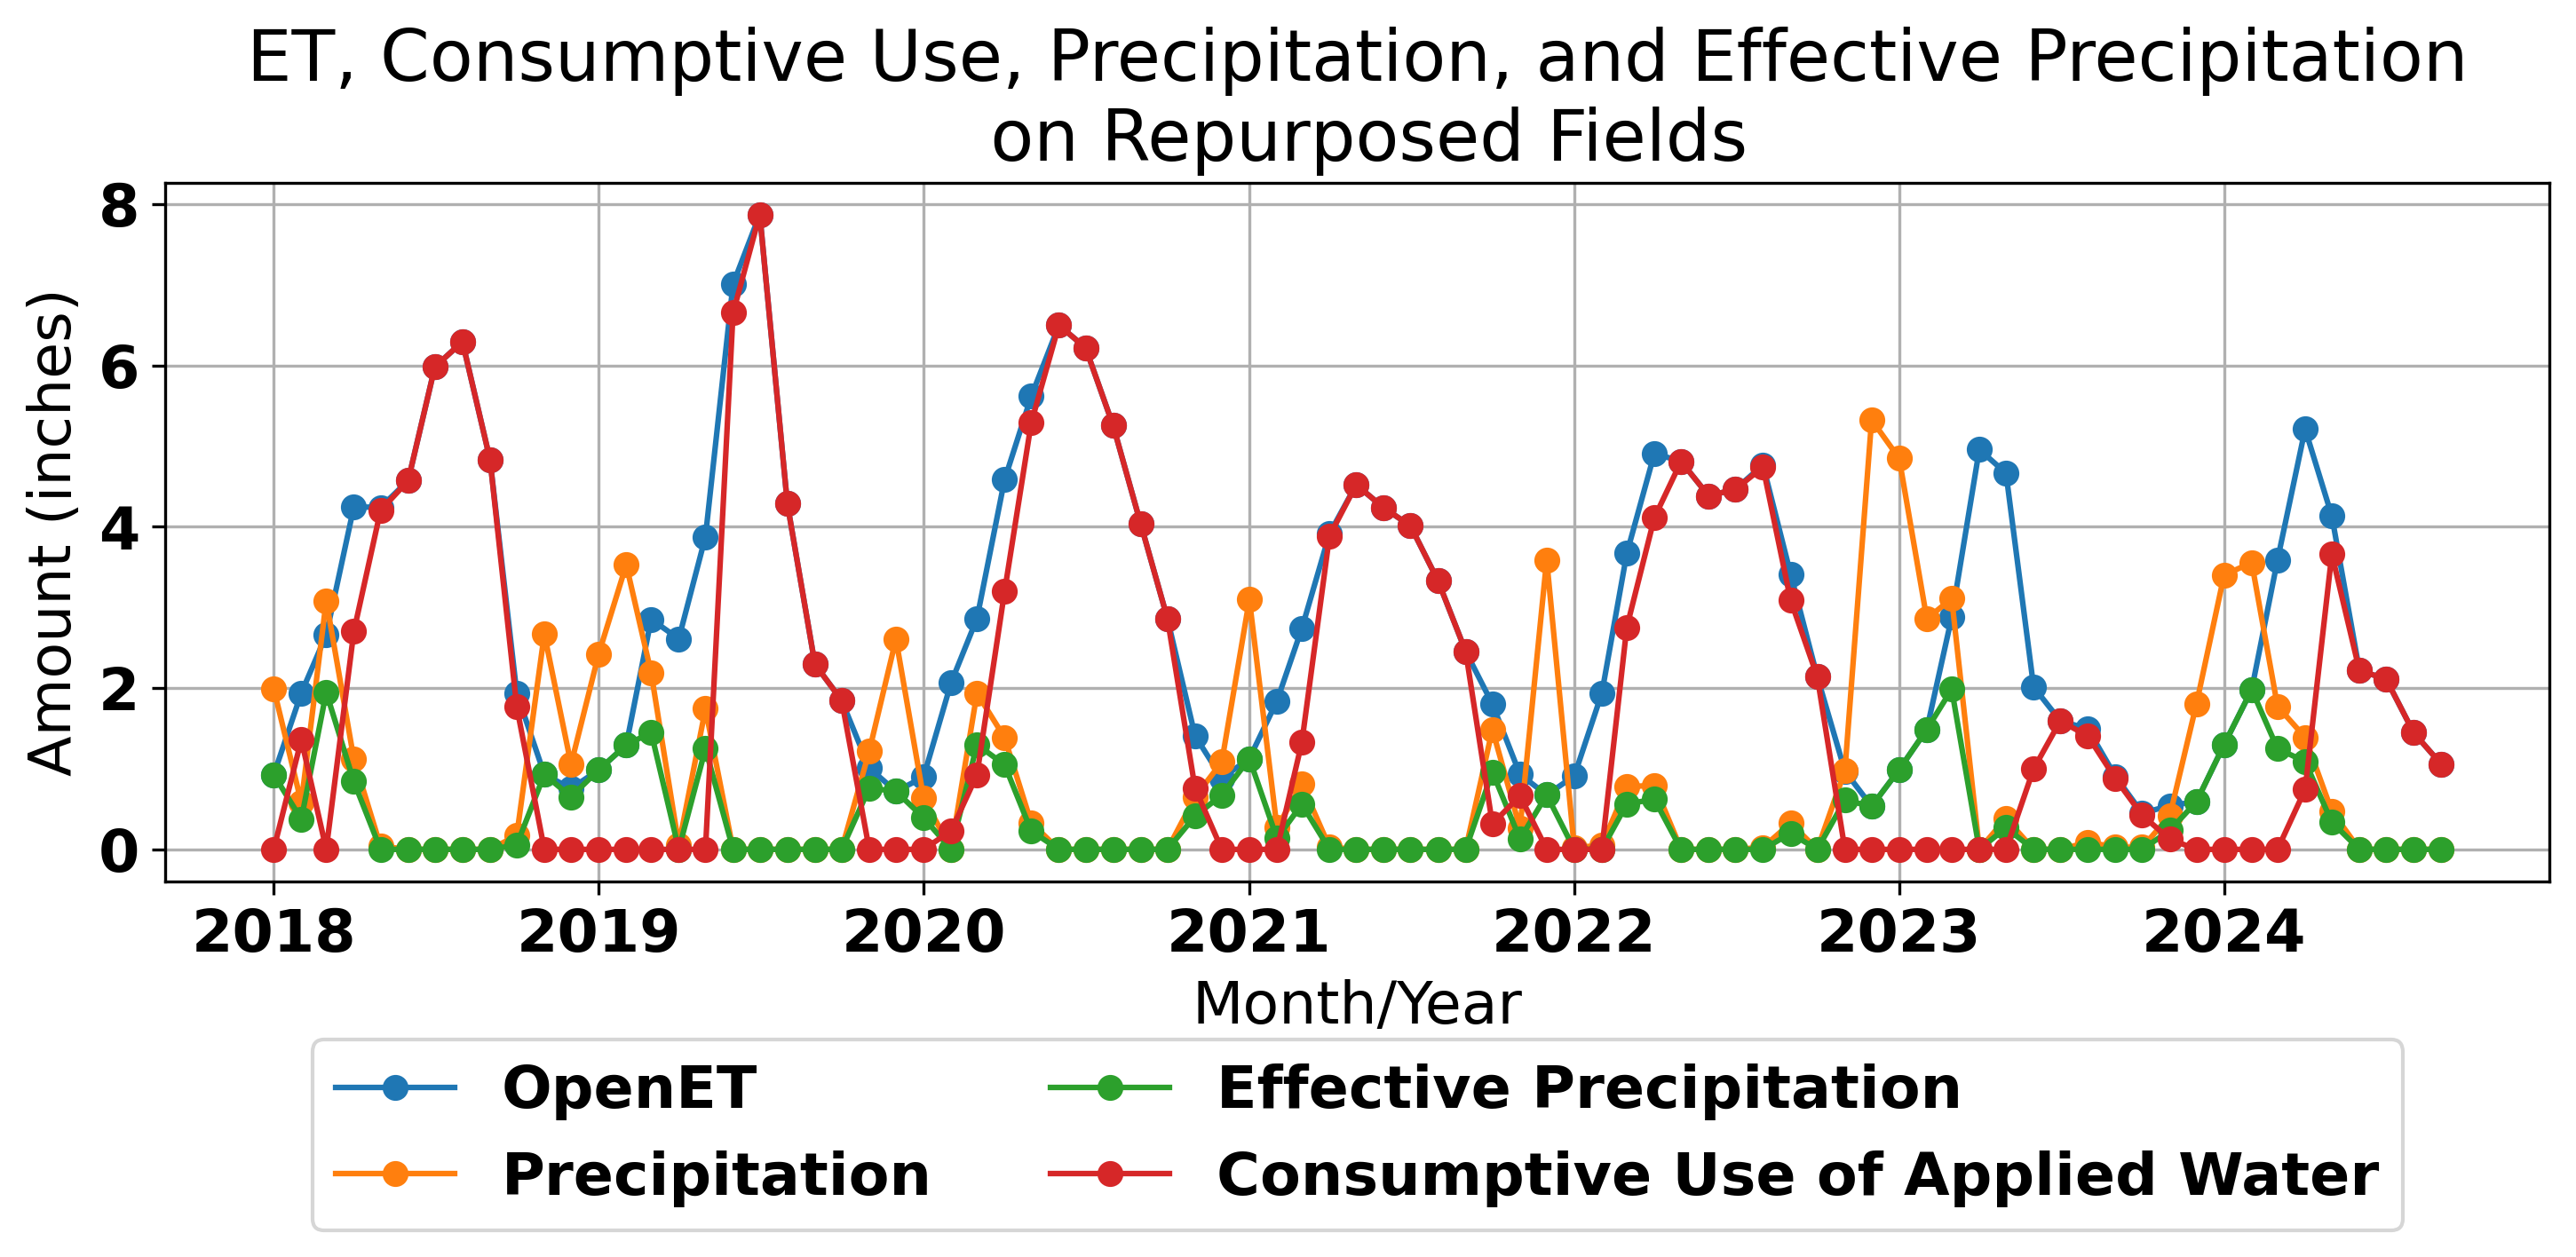

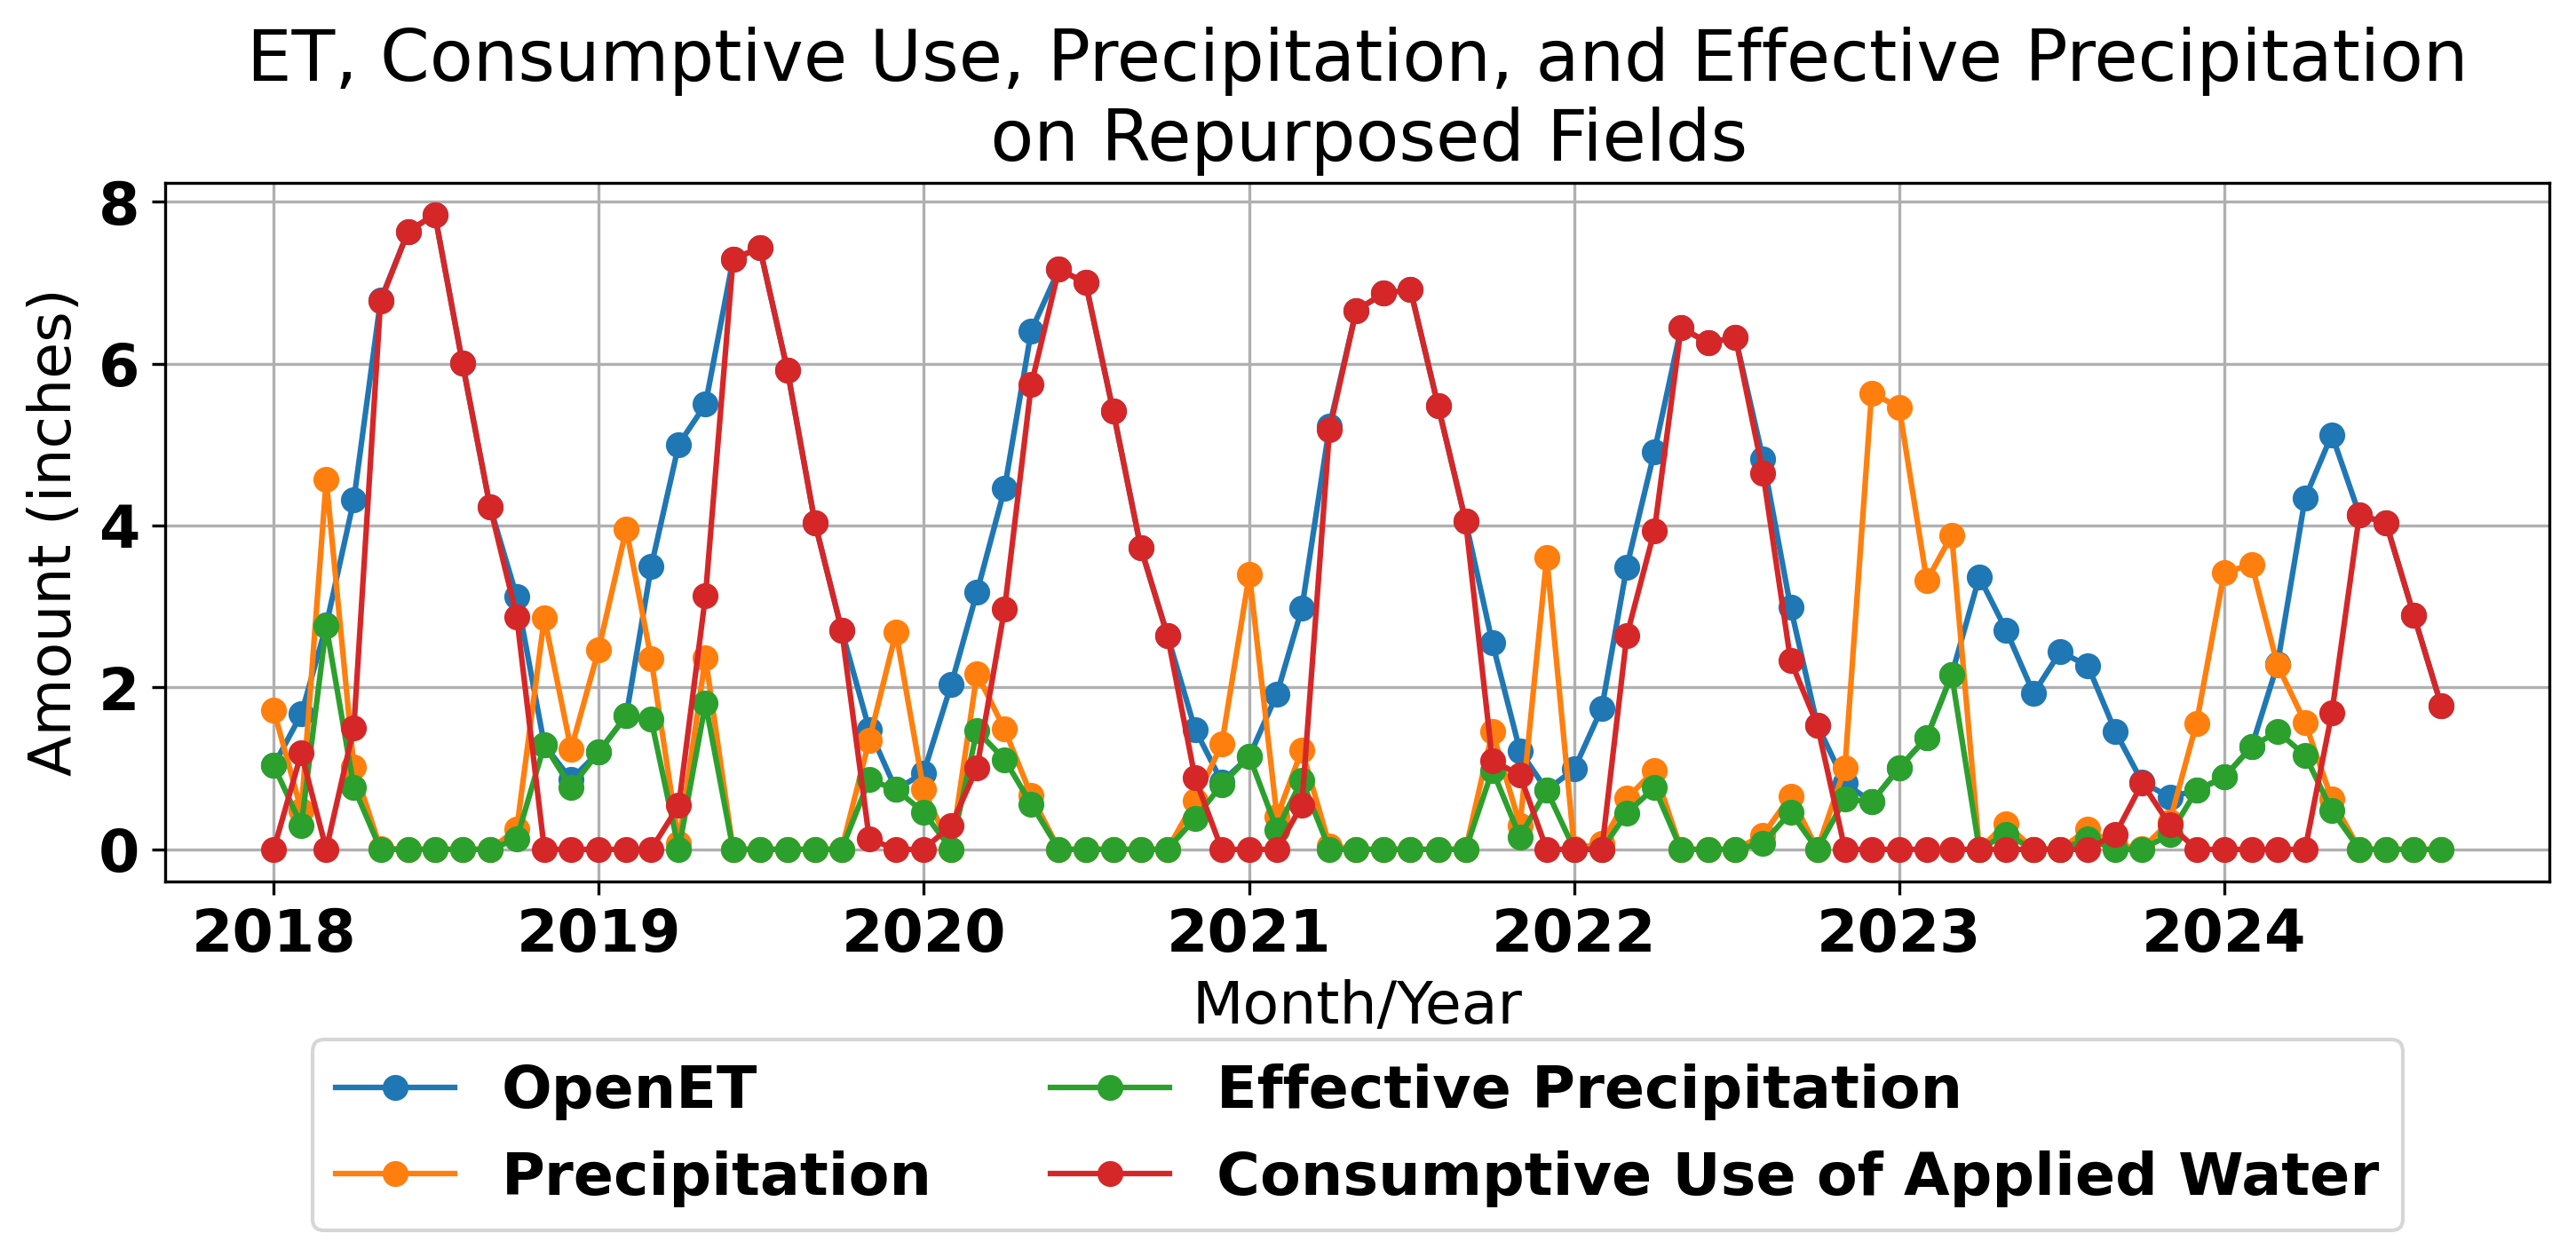

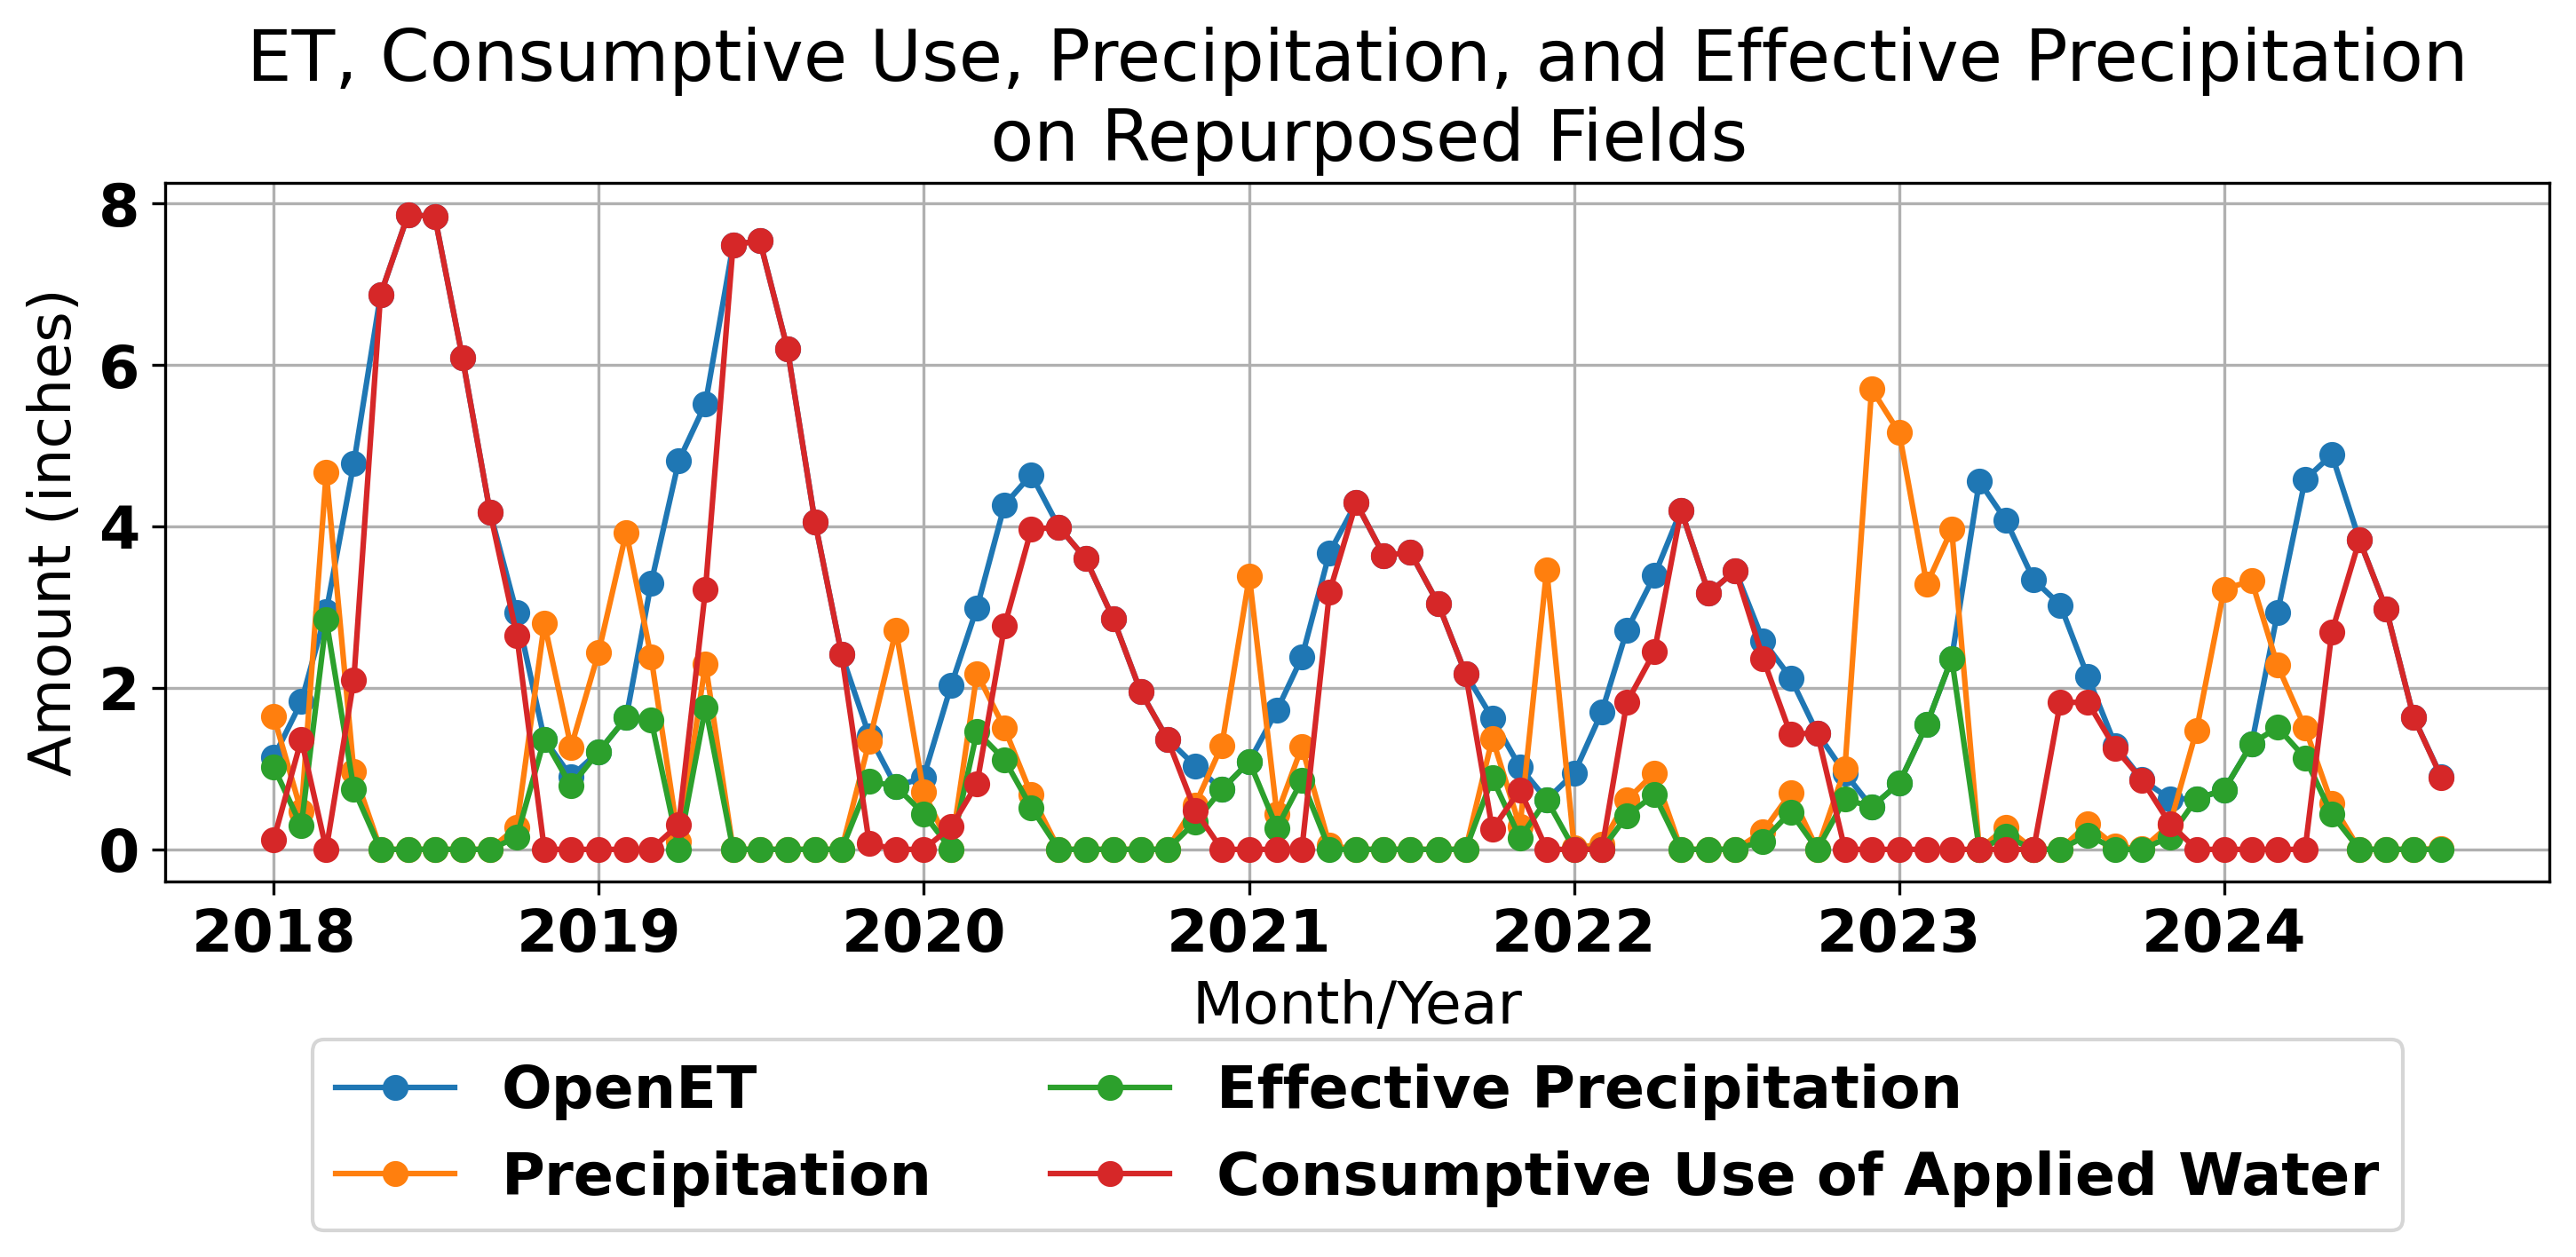

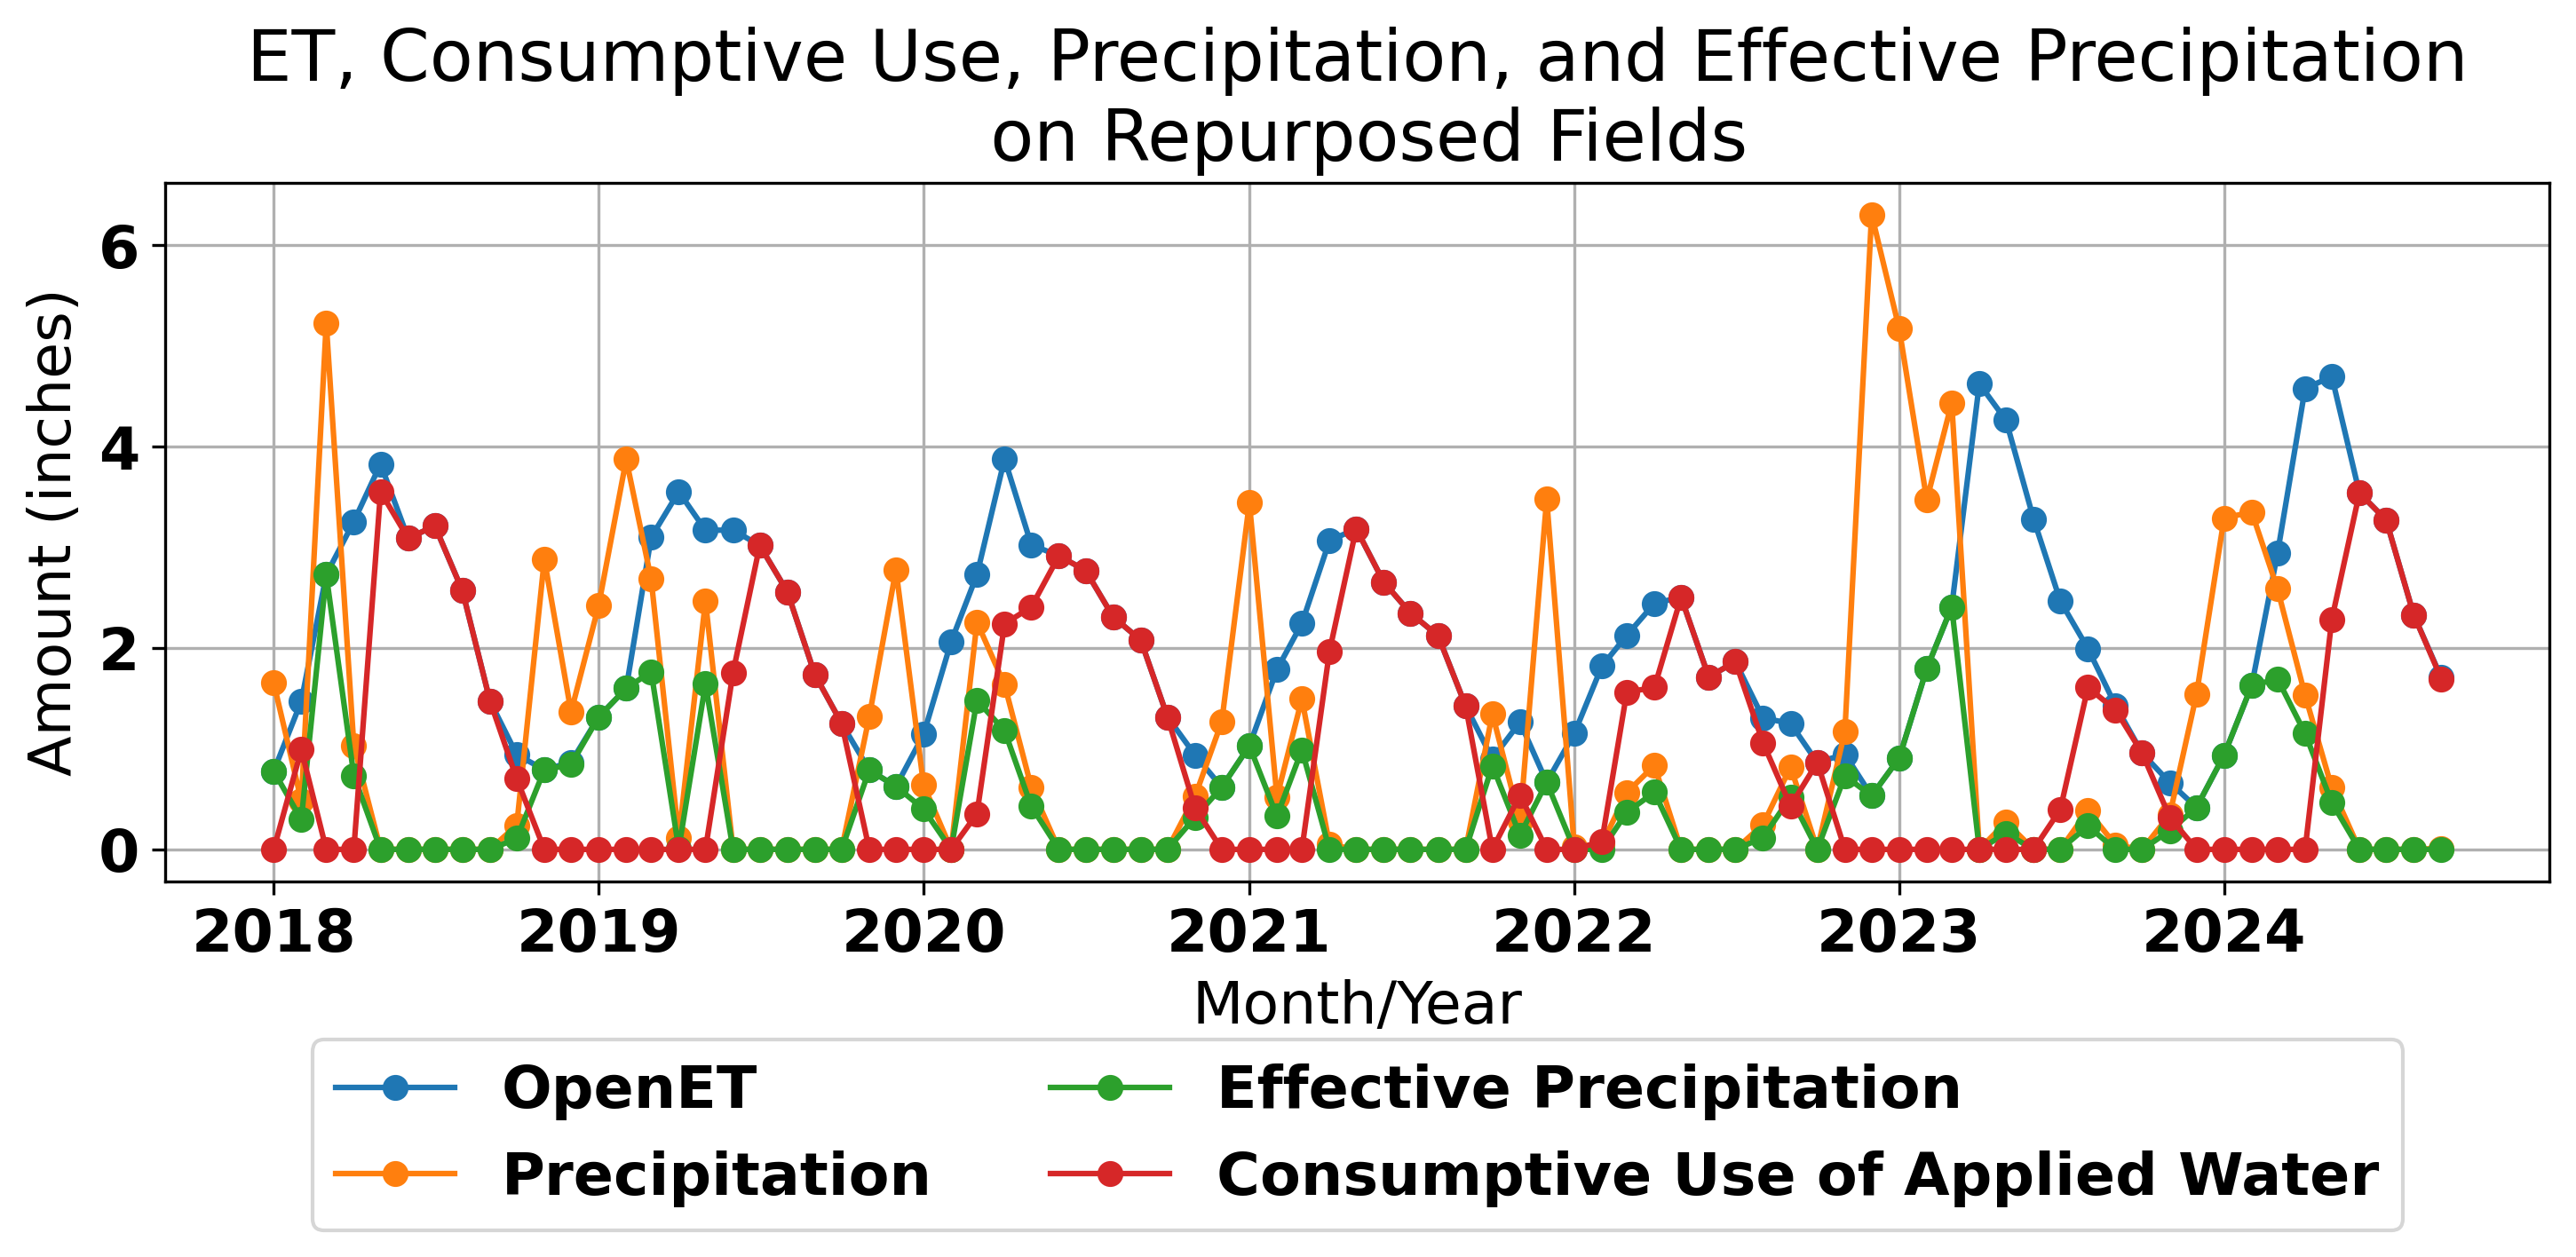

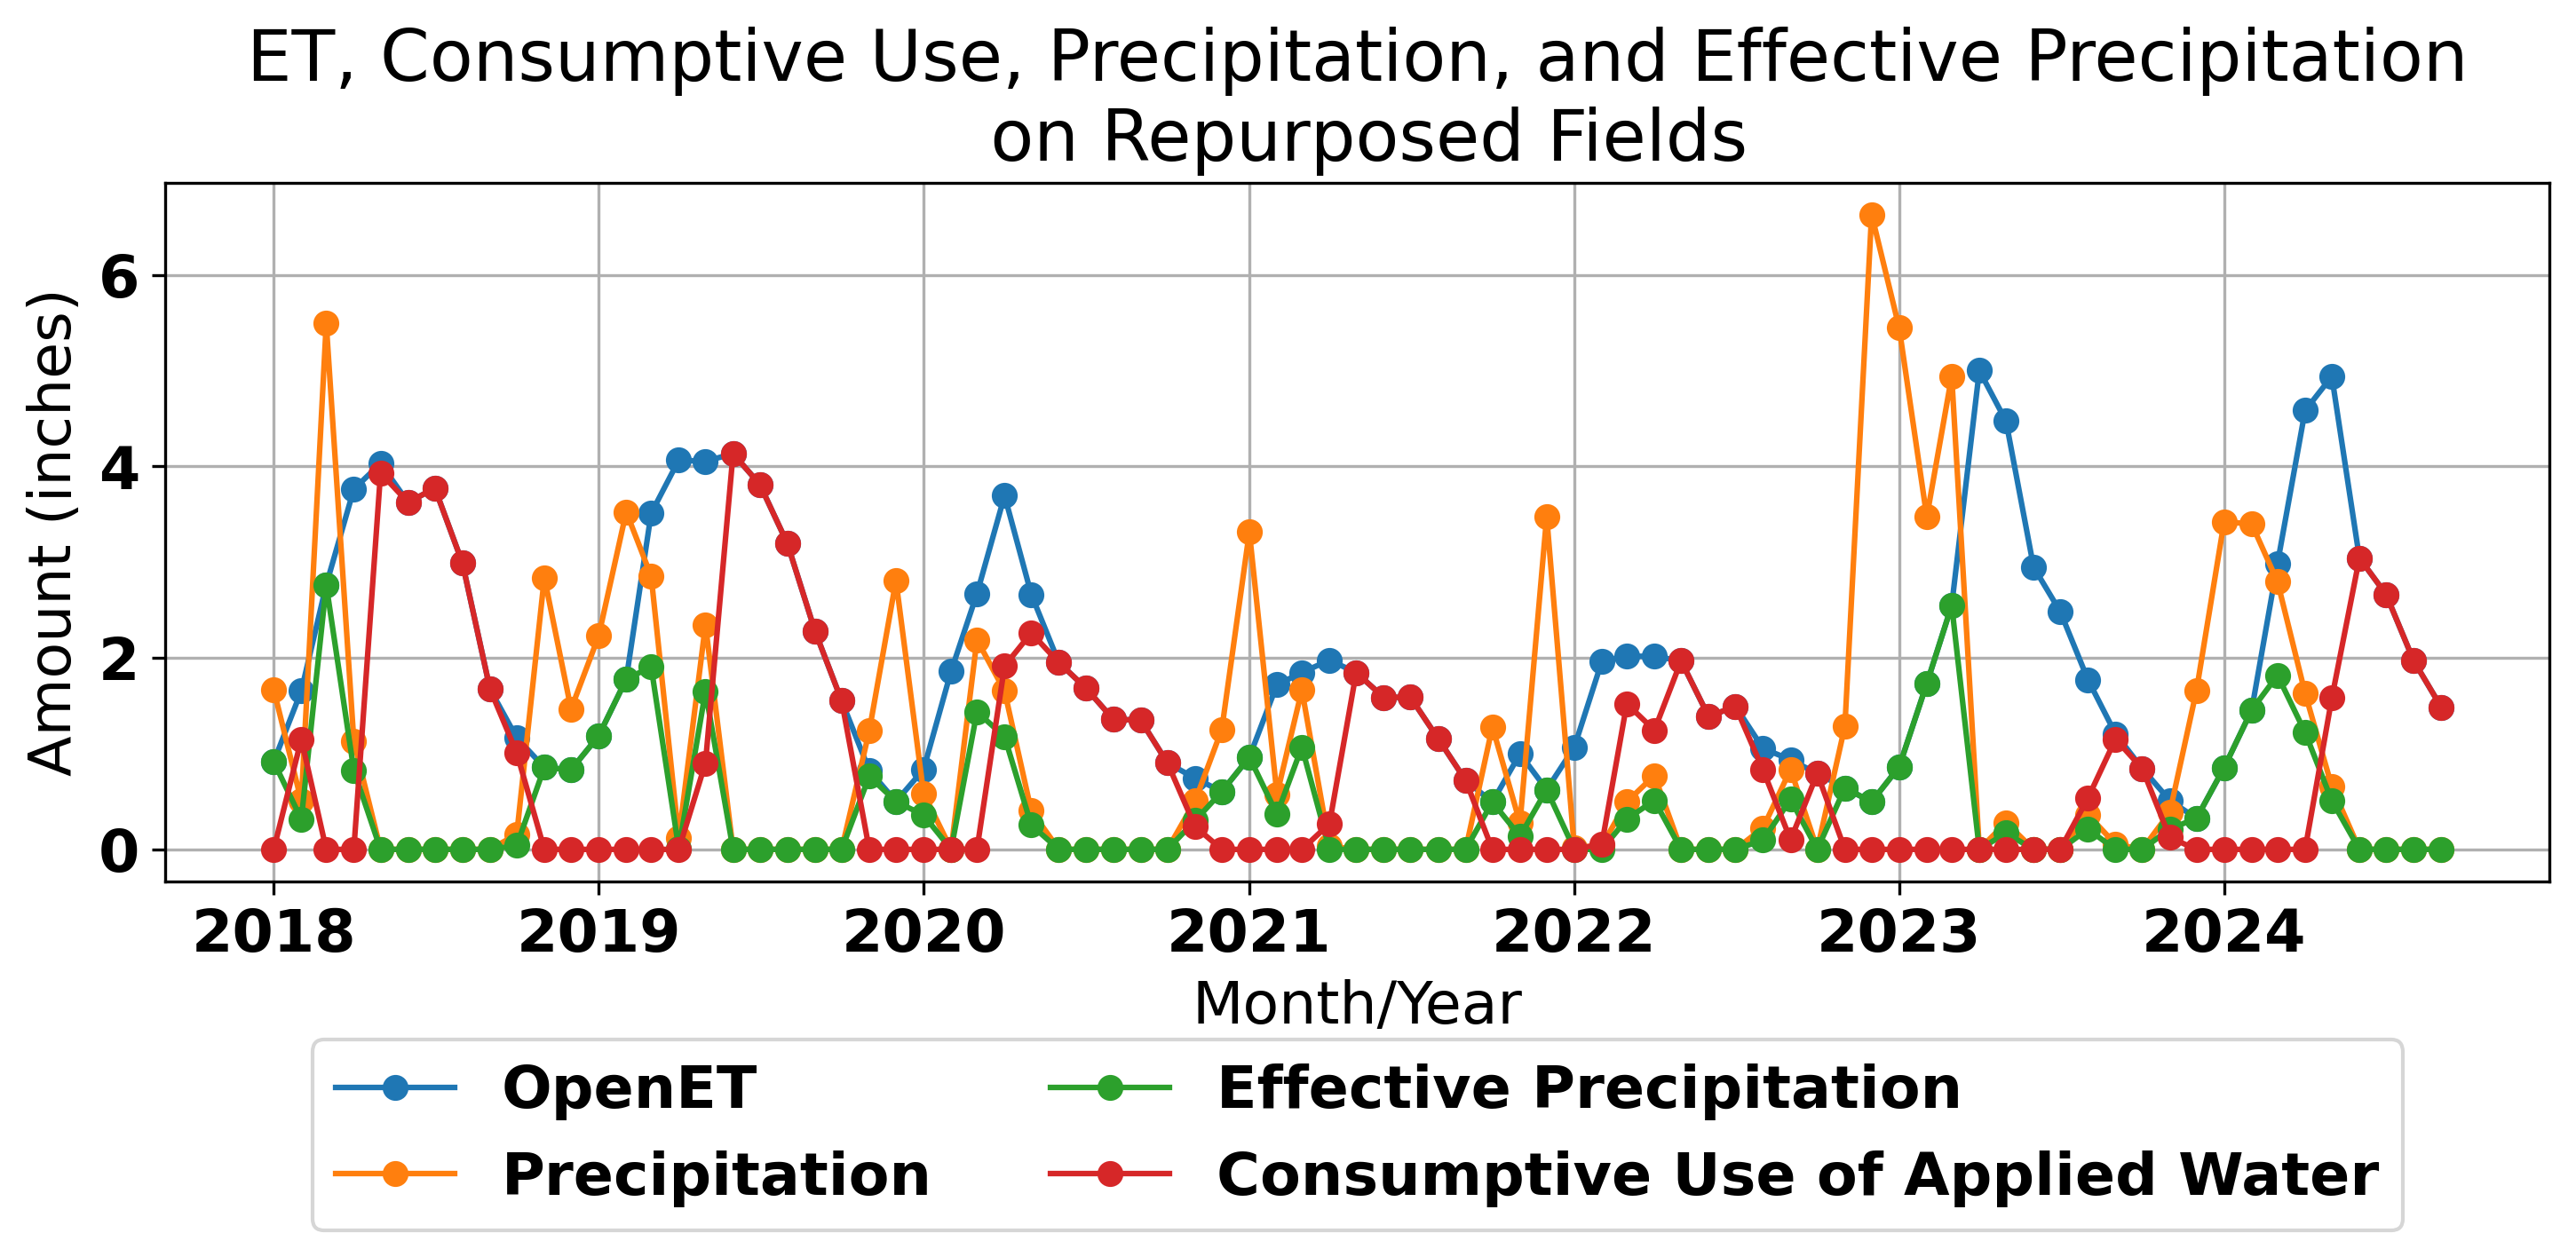

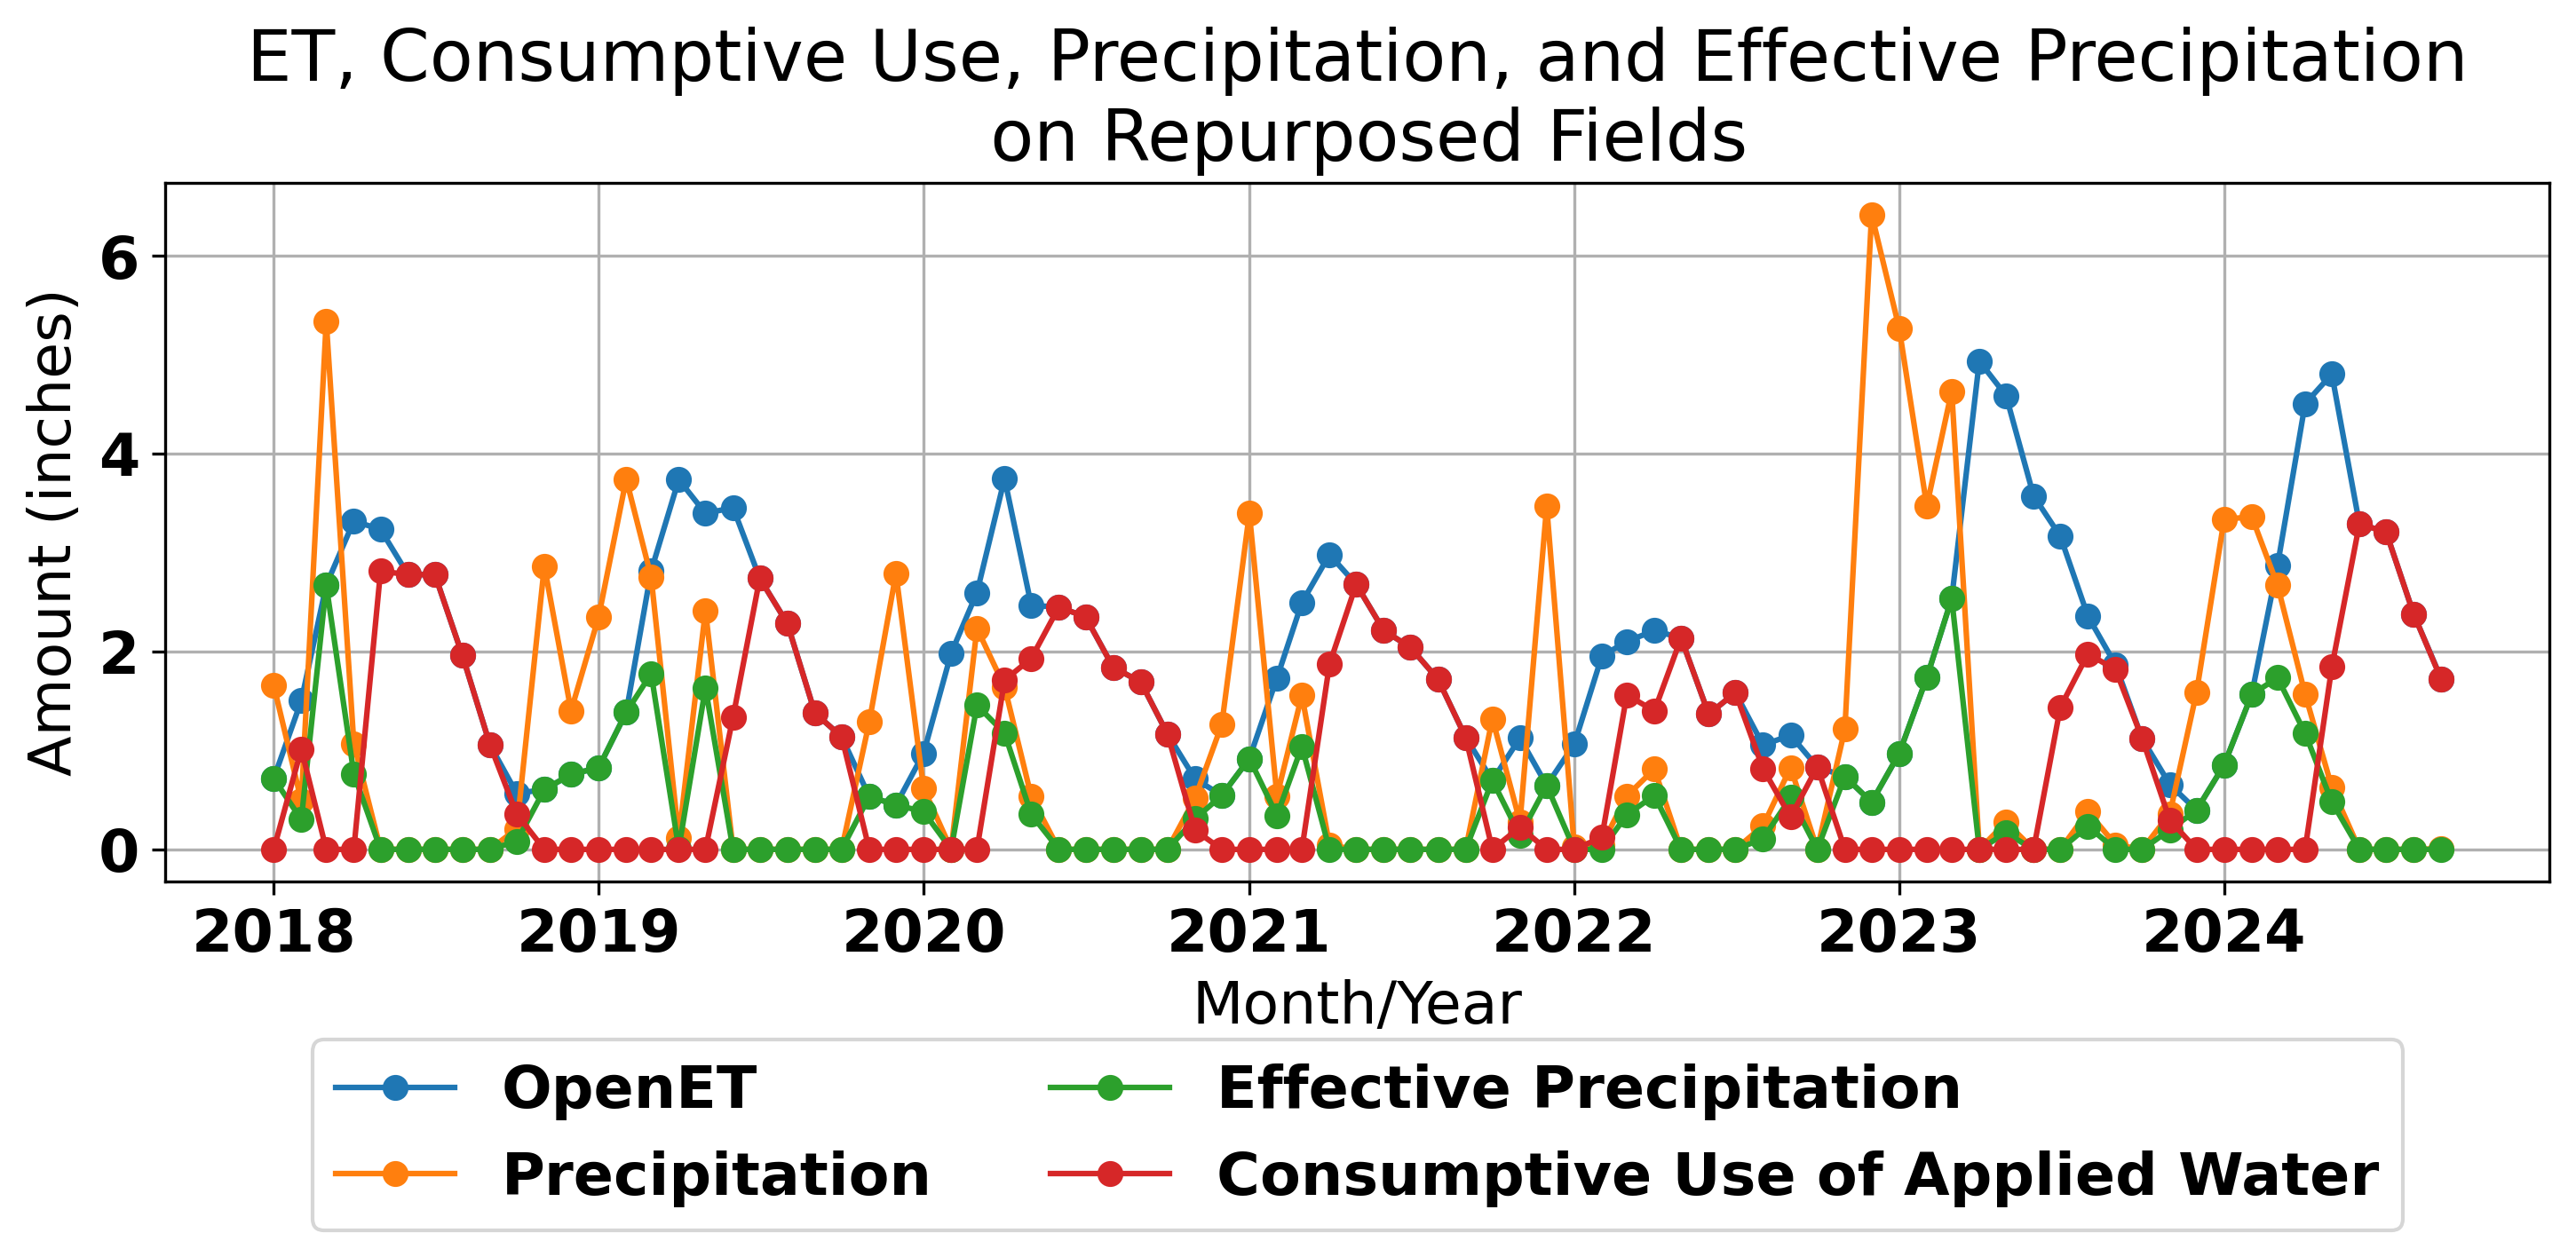

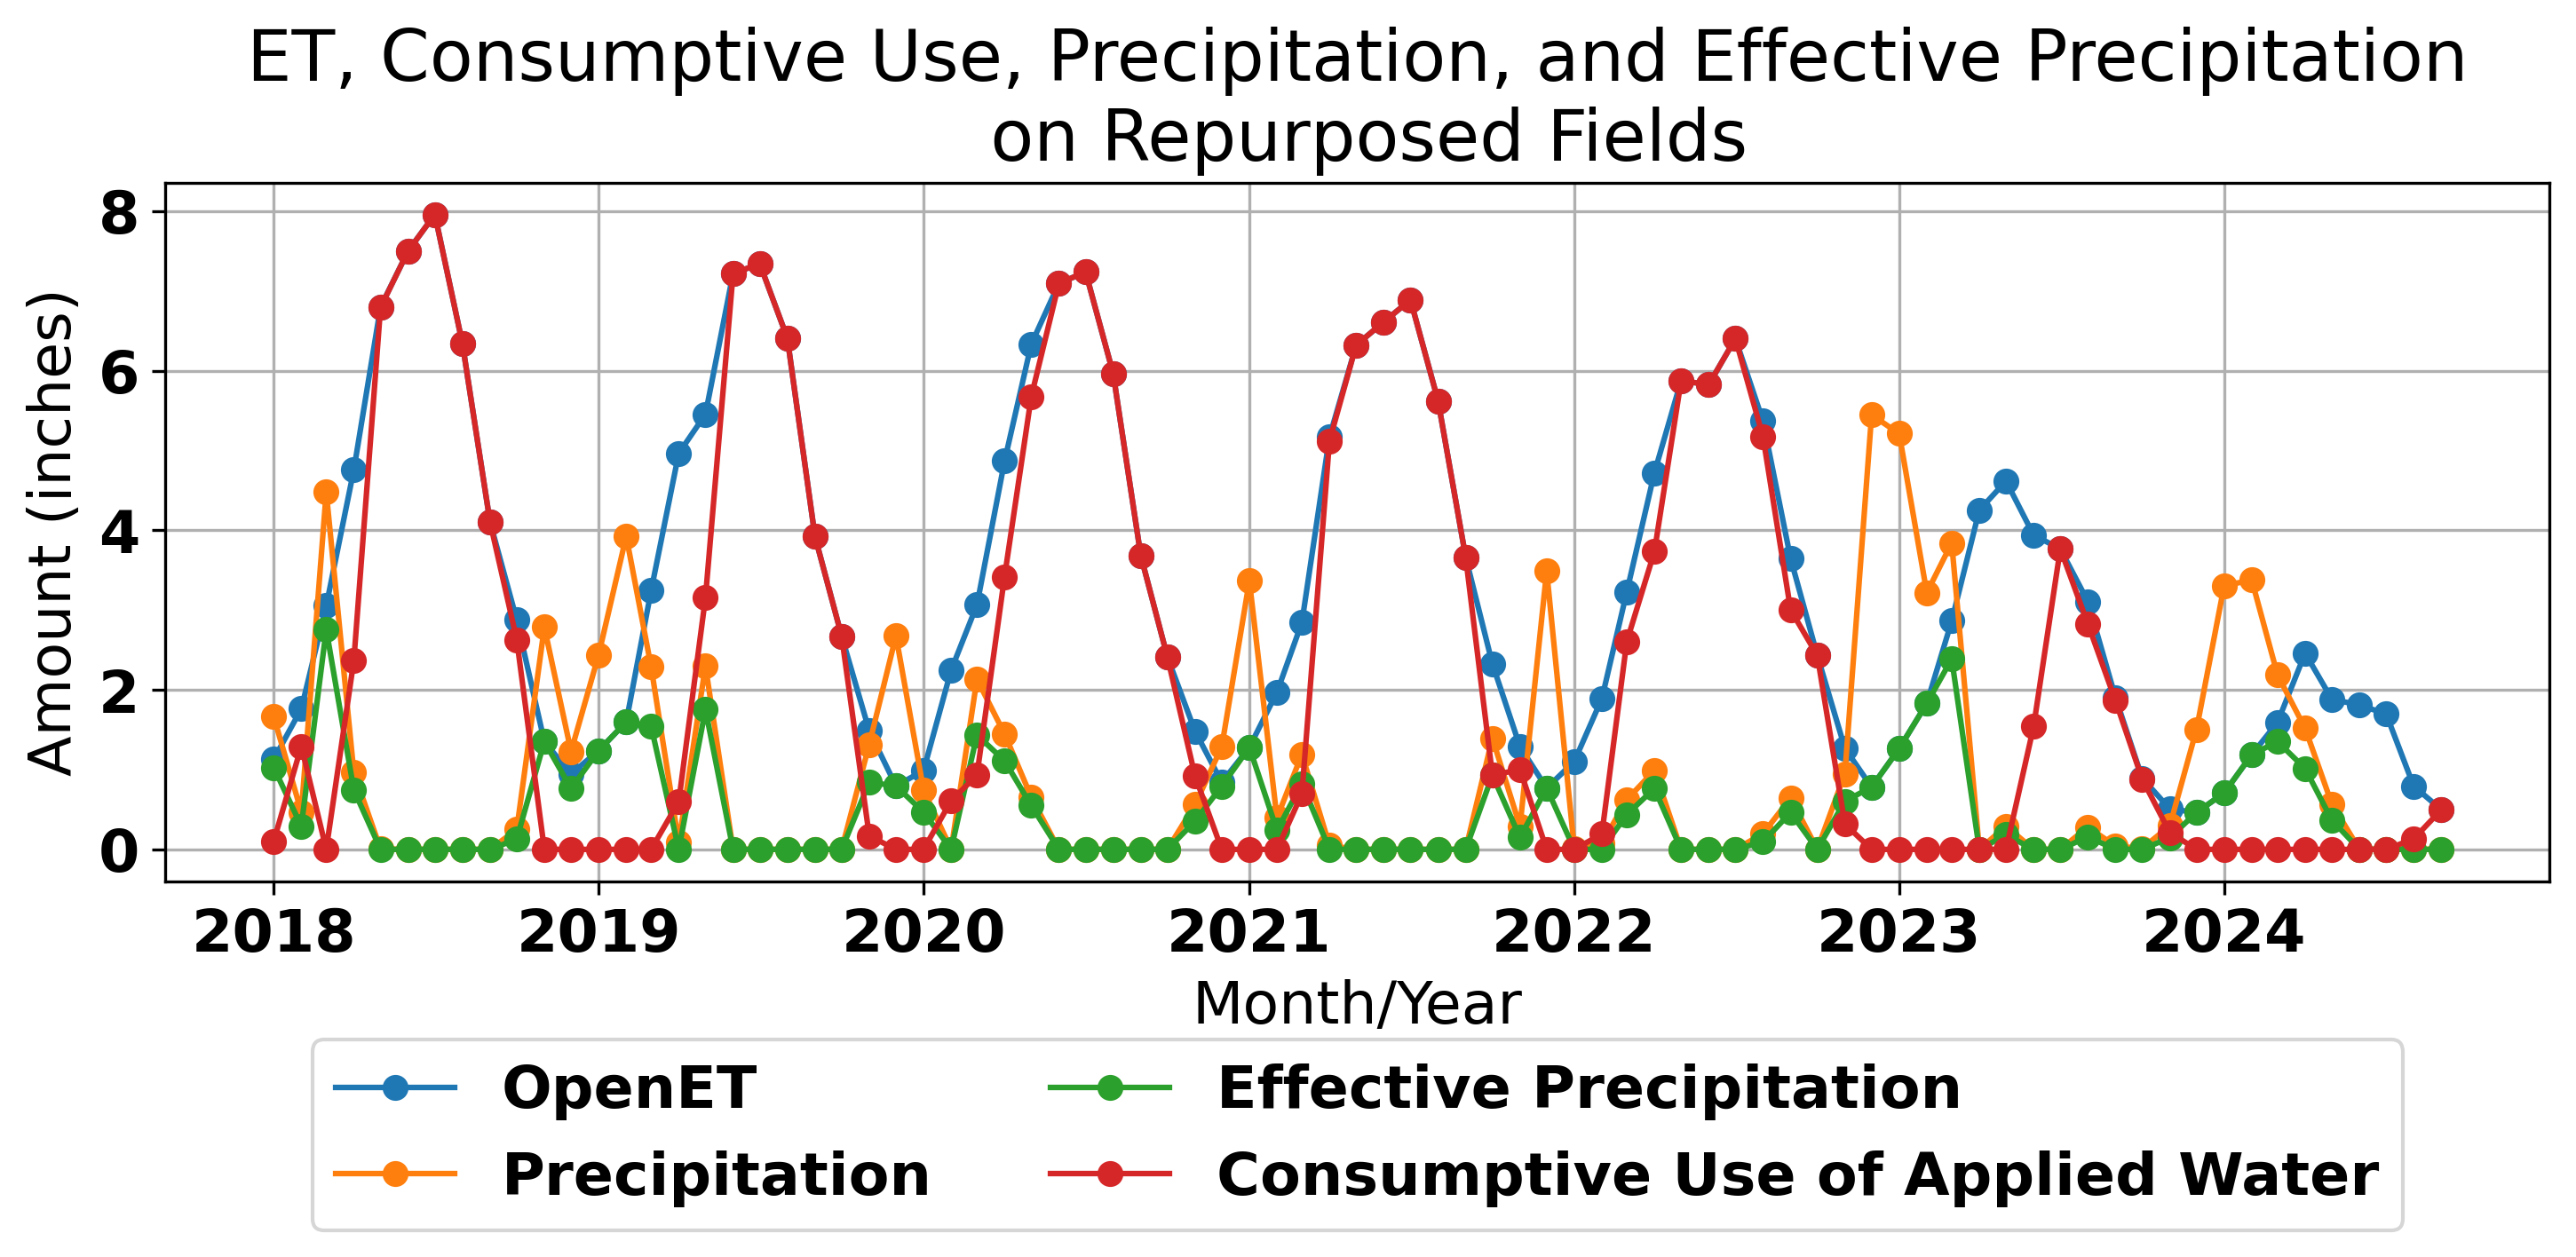

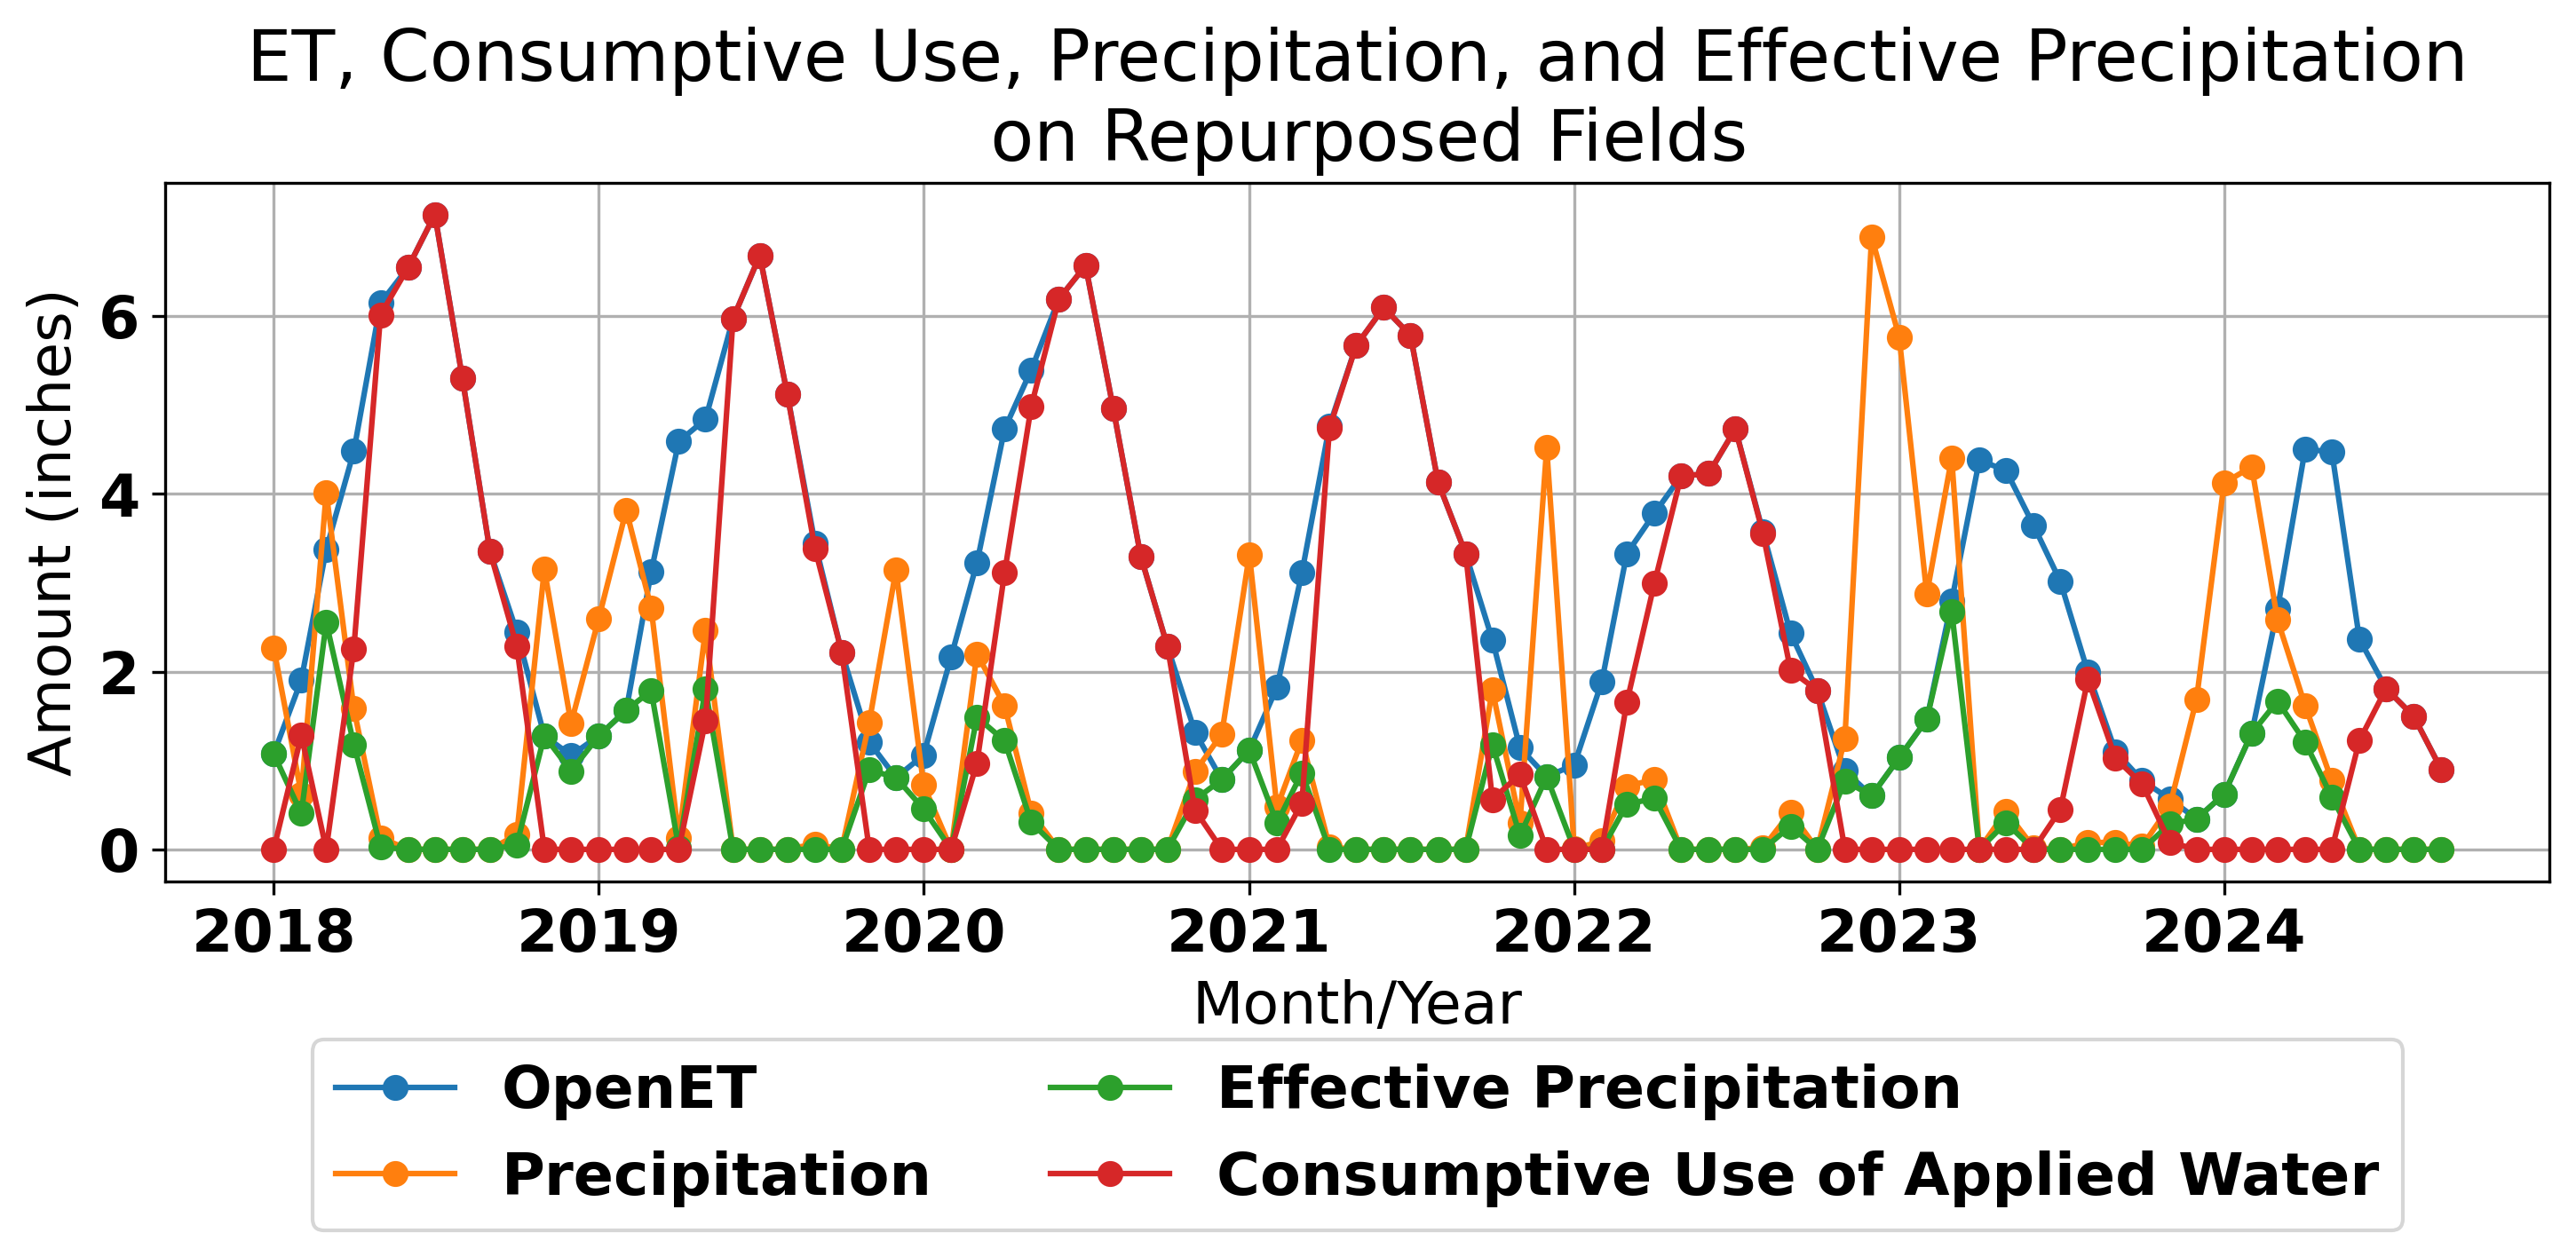

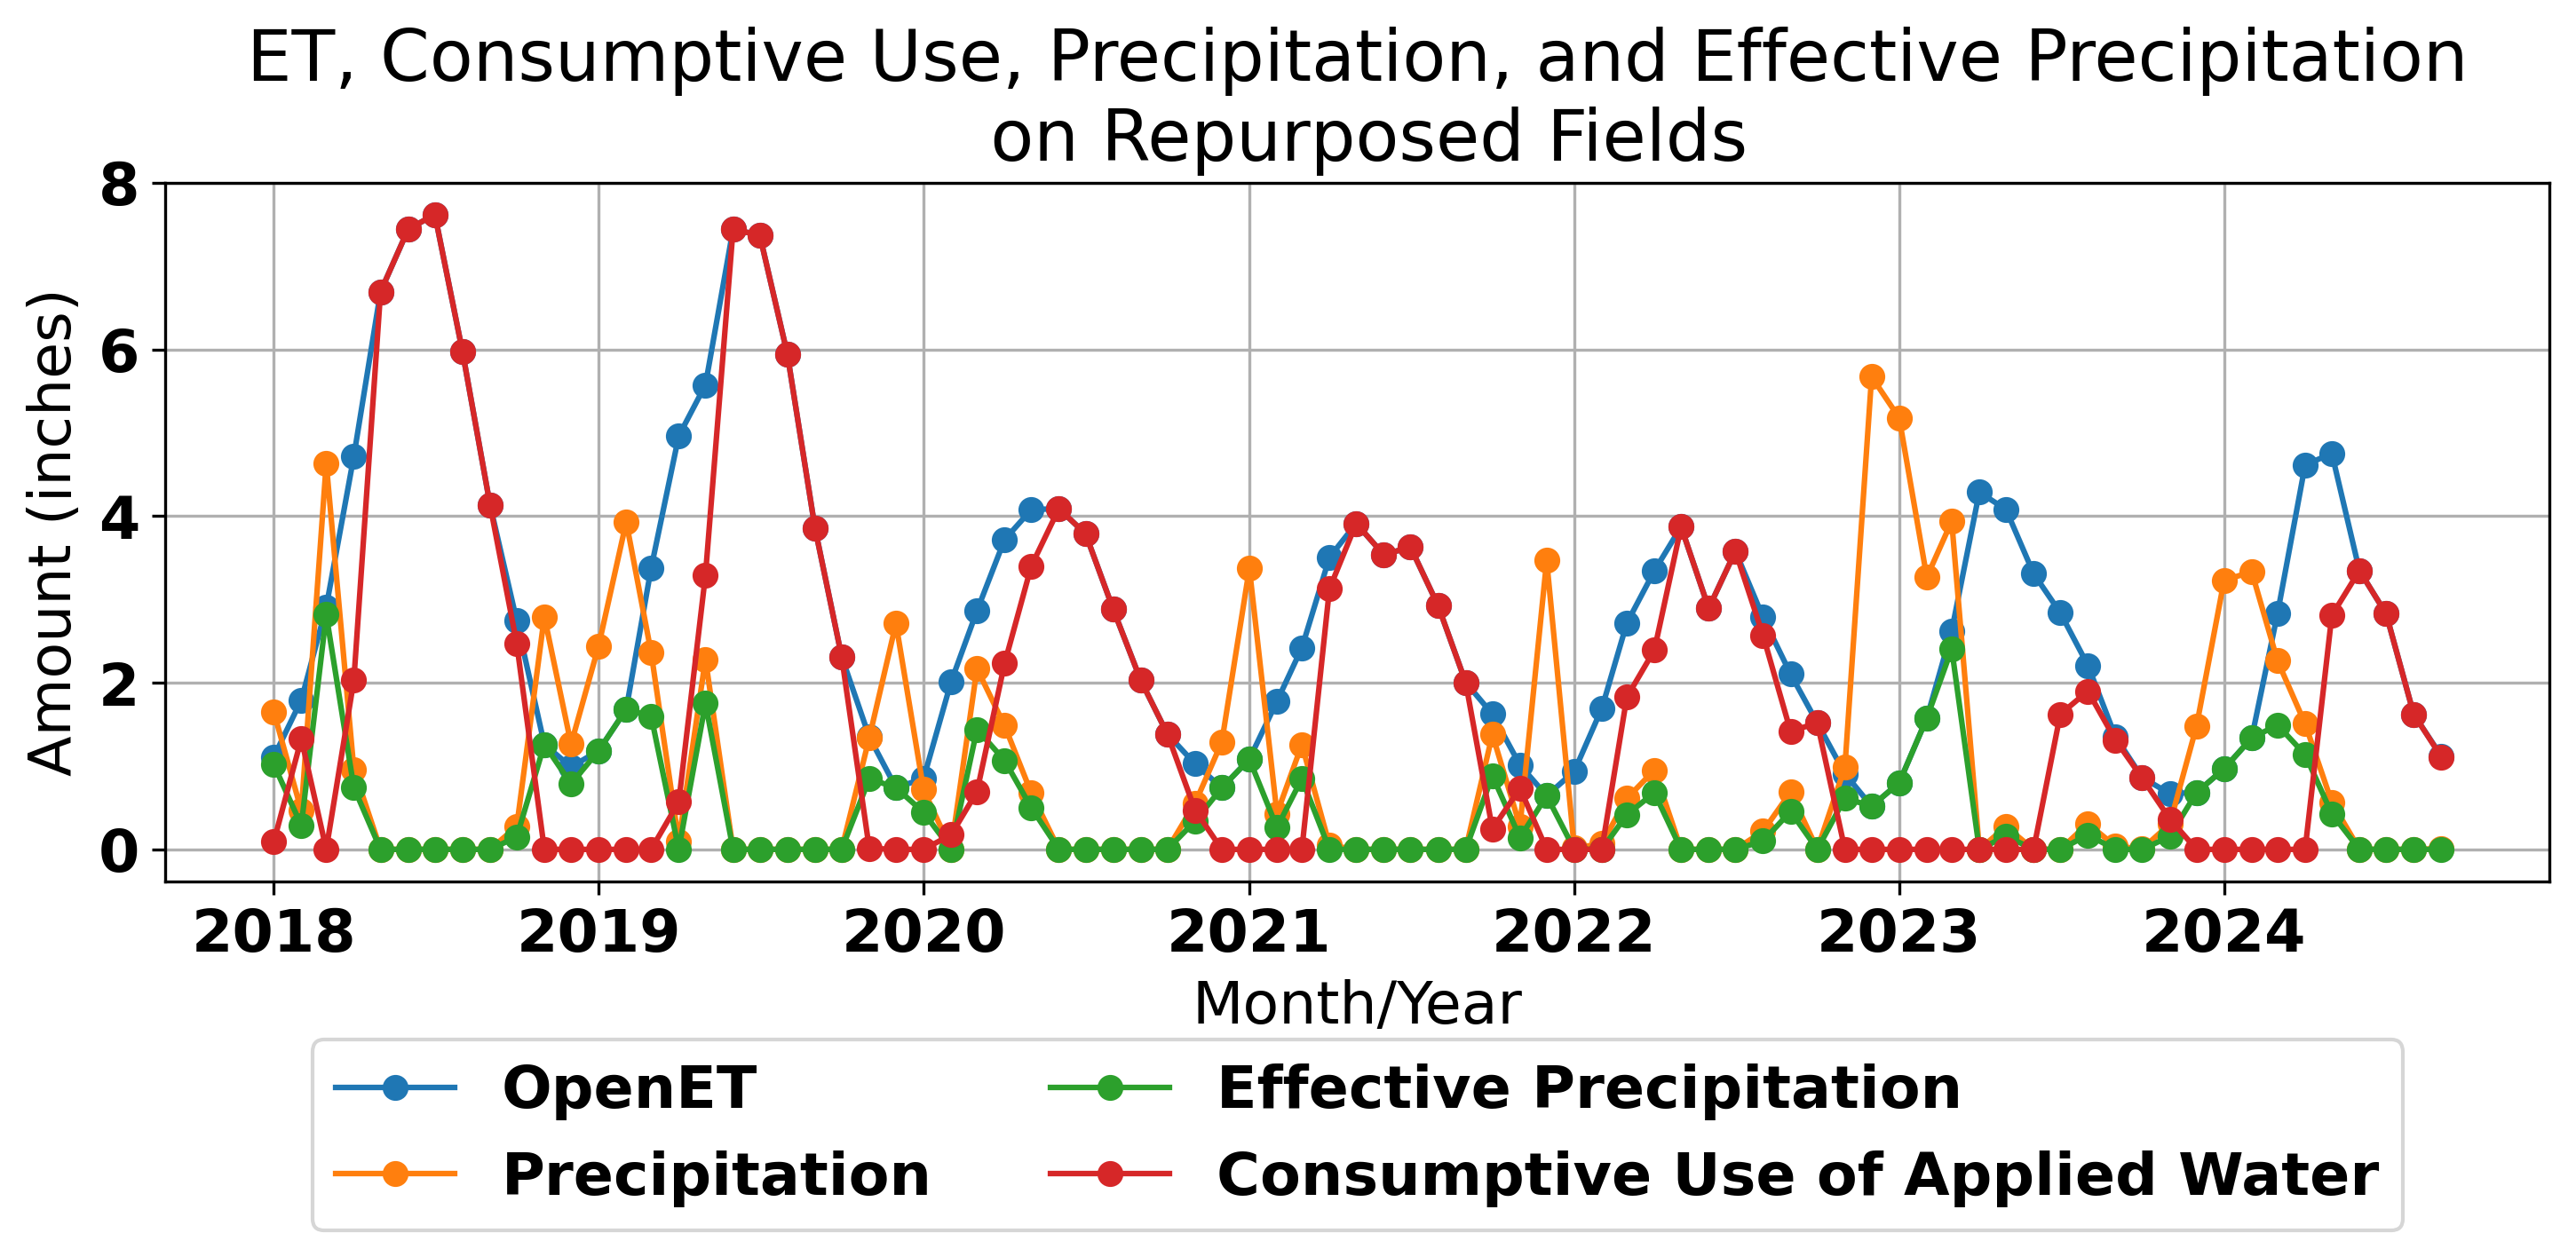

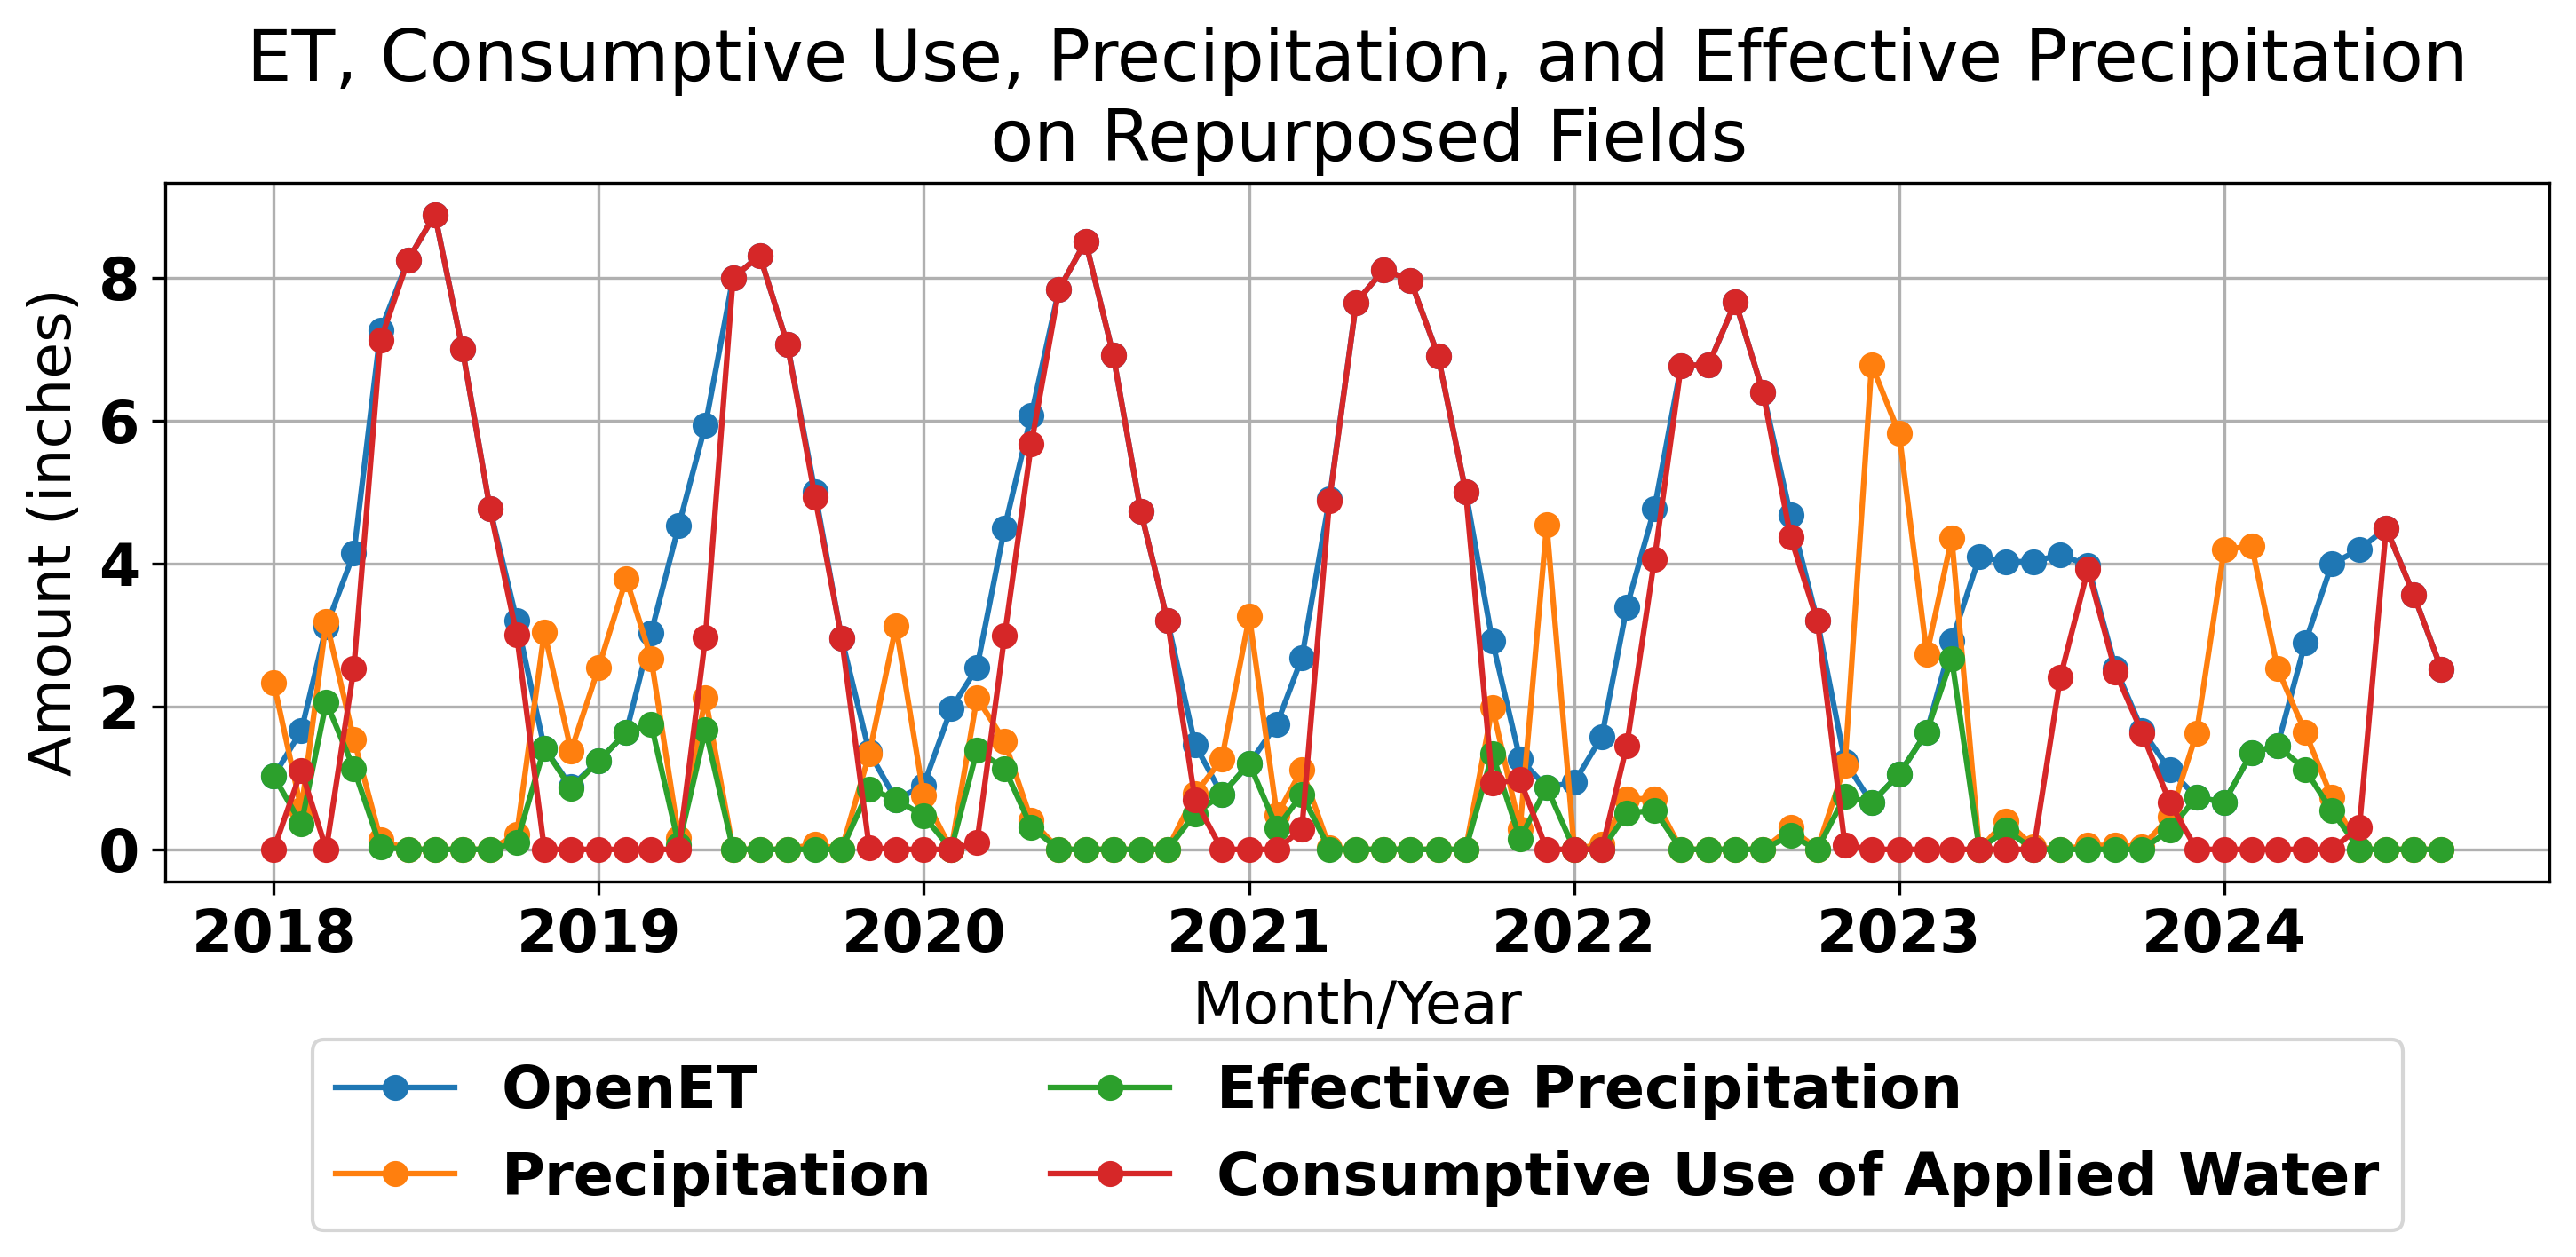

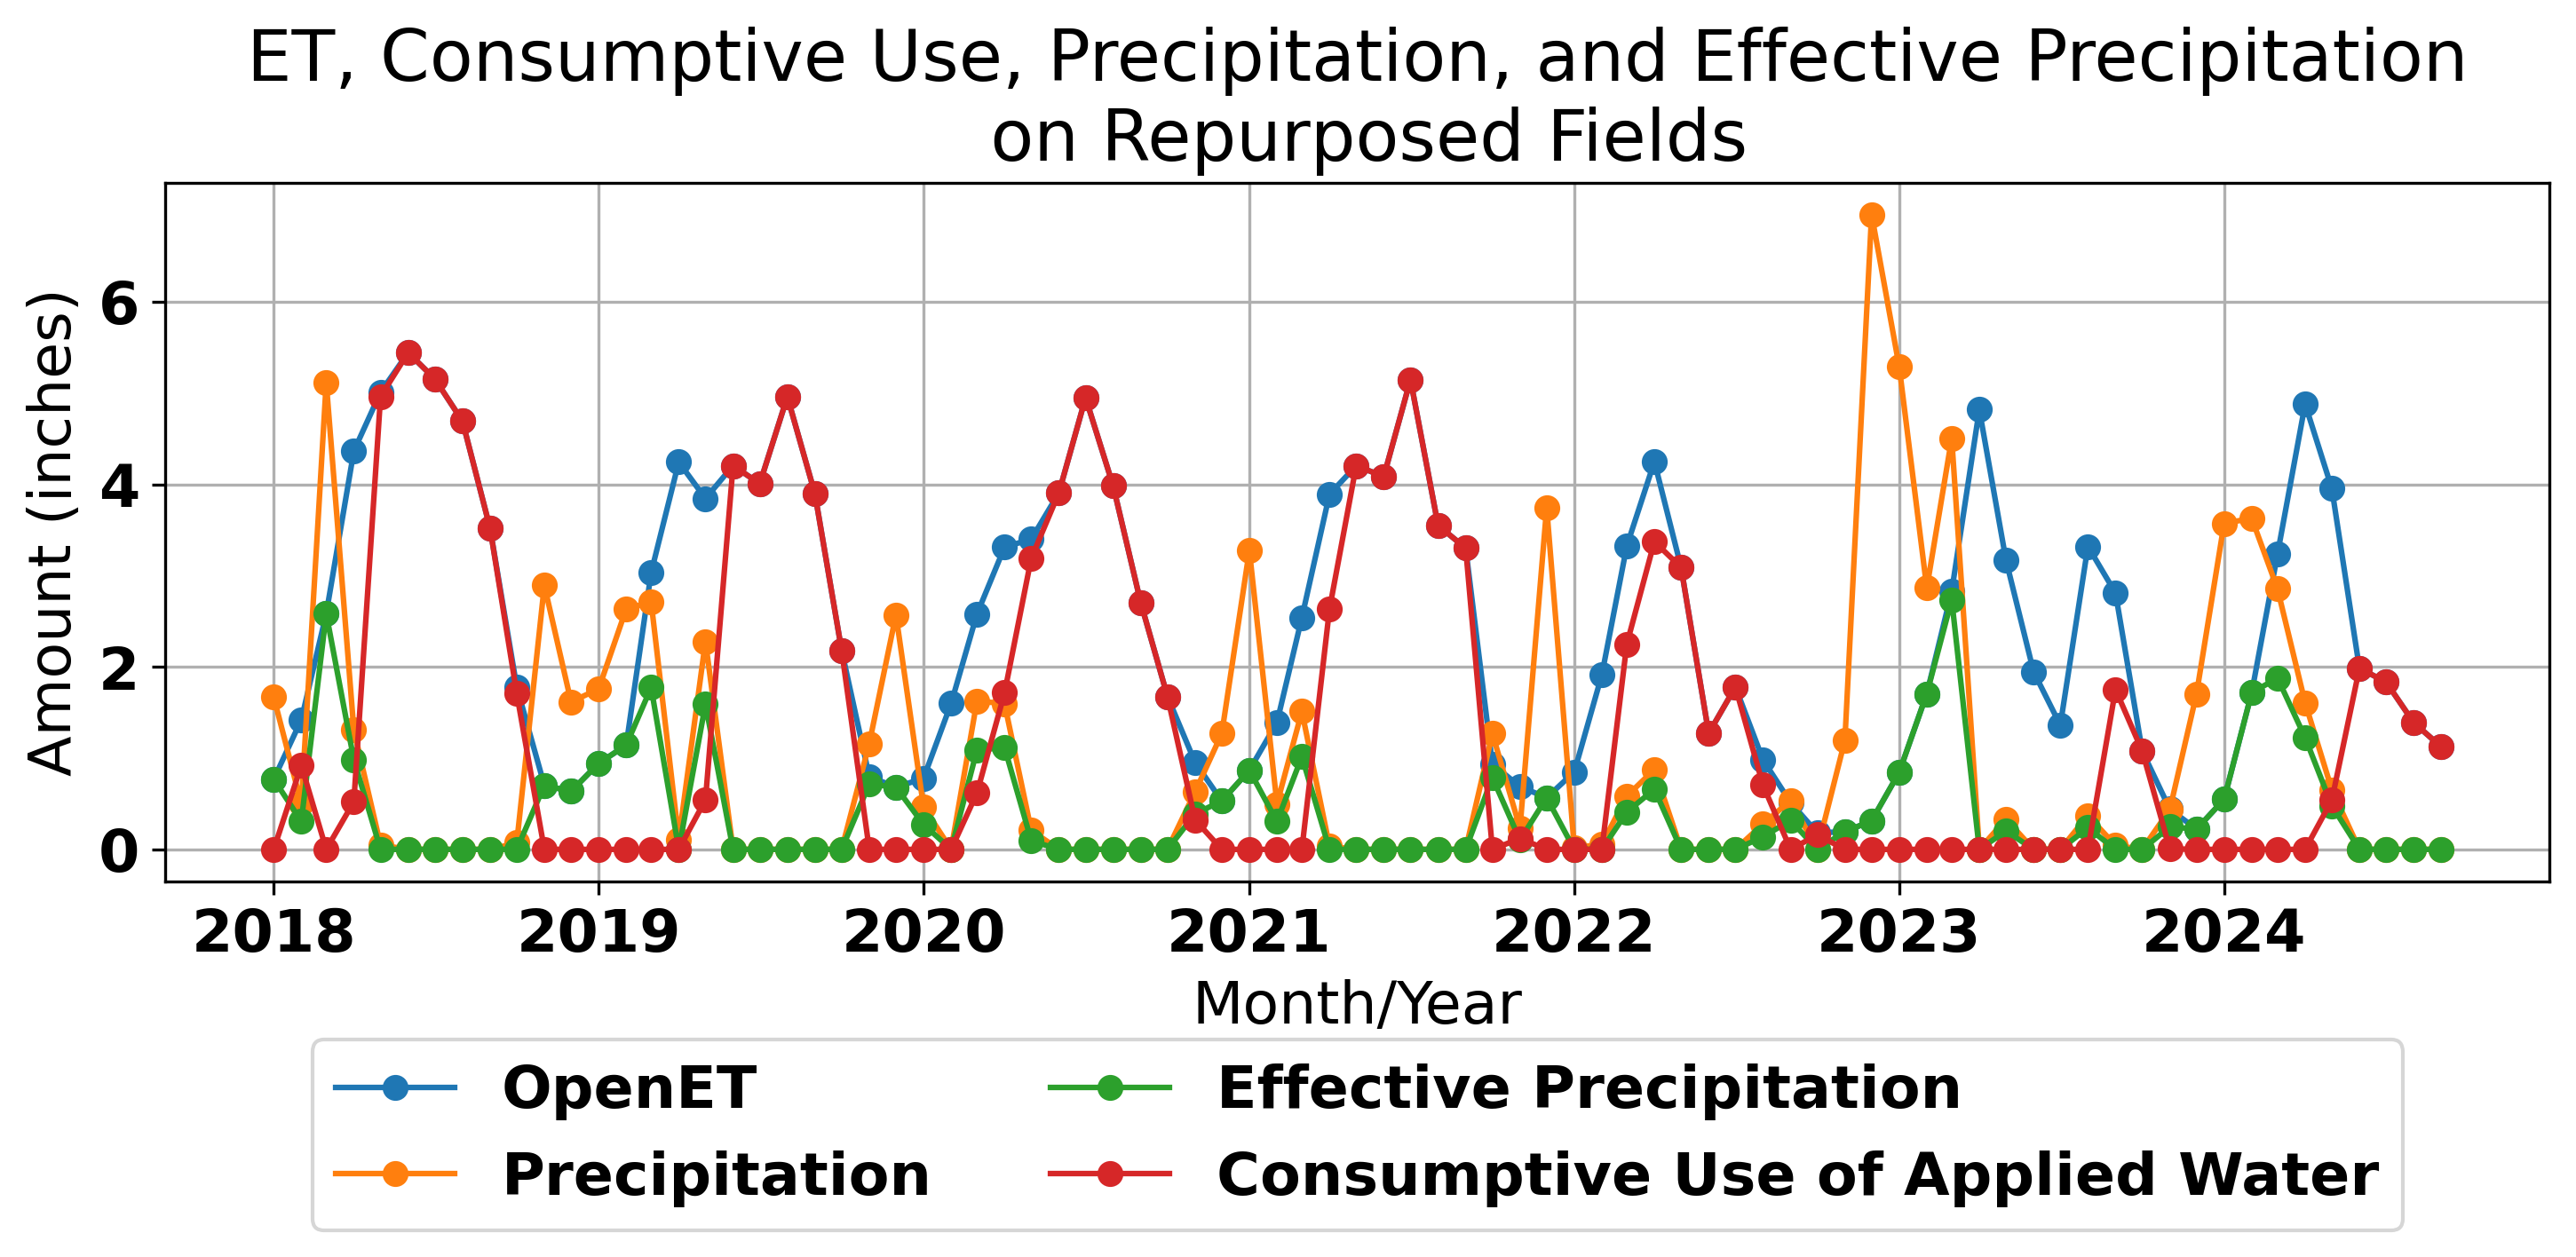

In [6]:
# User modify here the water year 

water_year = 2024
quarter = "Q4"
repurposed = "repurposed" # repurposed or nonrepurposed

## DO NOT MODIFY BELOW THIS LINE UNLESS THE PATH TO REPORTS HAS CHANGED  ##

path_to_reports = fr"Z:\Merced Subbasin GSA SGMA (C10076)\EKI Work Products\One-off deliverables\LRP\Reports\Quarterly\WY{water_year}_{quarter}\Report_PDFs"

os.makedirs(path_to_reports, exist_ok=True)

# Conduct data analysis and generate report from pdf 
for pdf_file in os.listdir(path_to_pdf_templates):
            
    try:
        path_pdf_template = os.path.join(path_to_pdf_templates, pdf_file)
        report = query_openet.GenerateLrpReport.from_pdf_template(path_pdf_template)
        
        participant_name = report.lrp_participant_name
        agreement_number = report.lrp_agreement_number
        
        # The year of the agreement is encoded in the agreement number
        y=int(str(agreement_number).strip())[0] + 1
        Year = f"Year{f}"
        
        print("Processing report for {}, {}".format(participant_name, agreement_number))
        
        report_file_name = f"MSGSA_LRP_quarterly_report_WY{water_year}-{quarter}_{agreement_number}_{participant_name}.pdf"        
        fname = os.path.join(path_to_reports, report_file_name)
        
        pr_data = os.path.join(path_to_folder_with_data,f"{Year}_enrolled_{repurposed}_pr.csv")
        et_data = os.path.join(path_to_folder_with_data,f"{Year}_enrolled_{repurposed}_ET.csv")
        
        
        smb = report.generate_lrp_report(fn_pp=pr_data,
                                     fn_et=et_data,
                                     fn_fld_key=path_ekifld,
                                     water_year=water_year,
                                     quarter=quarter,
                                     fn_report_out=fname
                                     )
        # save the csv with calculations
        path_to_csv_report = os.path.abspath(os.path.join(path_to_reports, '..'))
        
        
        #os.makedirs(path_to_csv_report, exist_ok=True)
        smb.save_consumptive_use_to_csv(path_to_csv_report)
    
    except Exception as e:
        print(e)
